<a href="https://colab.research.google.com/github/MarcelLopes7/Ciencia-de-Dados-Analytics/blob/main/Projeto_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas
## Autor: Marcel Antonio Lopes Pereira

## Introdução

Esse MVP consiste na análise de um dataset com dados de todos os países do mundo em 2023 (Global Country Information Dataset 2023). Inicialmente, não há um problema ou questão específica para ser solucionada com esses dados. Através da exploração e análise desses dados, algumas questões poderão surgir. A partir disso será explicado qual o tratamento que seria mais adequeado para esses dados na busca das respostas necessárias para solução do problema.
Inicialmente, são listados todos os atributos contidos nesse dataset:

**País**: Nome do país.  
**Densidade (P/Km²)**: Densidade populacional medida em pessoas por quilômetro quadrado.  
**Abreviação**: Abreviação ou código que representa o país.  
**Terras Agrícolas (%)**: Percentual da área territorial utilizada para fins agrícolas.  
**Área Territorial (Km²)**: Área total do país em quilômetros quadrados.  
**Tamanho das Forças Armadas**: Tamanho das forças armadas no país.  
**Taxa de Natalidade**: Número de nascimentos por 1.000 habitantes por ano.  
**Código de Discagem**: Código internacional de discagem do país.  
**Capital/Cidade Principal**: Nome da capital ou da principal cidade.  
**Emissões de CO₂**: Emissões de dióxido de carbono em toneladas.  
**IPC**: Índice de Preços ao Consumidor, uma medida da inflação e do poder de compra.  
**Variação do IPC (%)**: Percentual de variação do Índice de Preços ao Consumidor em relação ao ano anterior.  
**Código da Moeda**: Código da moeda usada no país.  
**Taxa de Fecundidade**: Número médio de filhos que uma mulher teria ao longo da sua vida.  
**Área Florestada (%)**: Percentual da área territorial coberta por florestas.  
**Preço da Gasolina**: Preço do litro de gasolina na moeda local.  
**PIB**: Produto Interno Bruto, o valor total de bens e serviços produzidos no país.  
**Taxa Bruta de Matrícula no Ensino Primário (%)**: Taxa bruta de matrícula no ensino primário.  
**Taxa Bruta de Matrícula no Ensino Superior (%)**: Taxa bruta de matrícula no ensino superior.  
**Mortalidade Infantil**: Número de mortes de crianças menores de um ano por 1.000 nascidos vivos.  
**Maior Cidade**: Nome da maior cidade do país.  
**Expectativa de Vida**: Número médio de anos que um recém-nascido deve viver.  
**Razão de Mortalidade Materna**: Número de mortes maternas por 100.000 nascidos vivos.  
**Salário Mínimo**: Valor do salário mínimo na moeda local.  
**Idioma Oficial**: Idioma(s) oficial(is) falado(s) no país.  
**Despesas com Saúde Pagas do Próprio Bolso (%)**: Percentual dos gastos totais com saúde pagos diretamente pelos indivíduos.  
**Médicos por Mil Habitantes**: Número de médicos por mil habitantes.  
**População**: População total do país.  
**População: Participação na Força de Trabalho (%)**: Percentual da população que faz parte da força de trabalho.  
**Receita Tributária (%)**: Receita tributária como percentual do PIB.  
**Taxa Total de Impostos**: Carga tributária total como percentual dos lucros comerciais.  
**Taxa de Desemprego**: Percentual da força de trabalho que está desempregada.  
**População Urbana**: Percentual da população que vive em áreas urbanas.  
**Latitude**: Coordenada de latitude da localização do país.  
**Longitude**: Coordenada de longitude da localização do país.






















## Importação das bibliotecas

Com os atributos definidos, o código do programa inicia com a importação das bibliotecas python que serão utilizadas nesse projeto. A seguir, são definidas algumas funções que serão utilizadas ao longo do código.

In [100]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import missingno as ms # para tratamento de missings
import math

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização

In [101]:
!pip install unidecode
from unidecode import unidecode

Essa biblioteca auxilia na tradução de expressões

In [102]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

Essa biblioteca auxilia no processo de associação de nome de um país ao continente onde o mesmo está localizado.

In [103]:
!pip install pycountry_convert
import pycountry_convert as pc

Essa biblioteca é utilizada para gerar um mapa do mundo e pontos de interesse podem ser marcados no mesmo

In [104]:
!pip install folium
import folium
from folium.plugins import MarkerCluster

## Funções utilizadas no programa


São definidas a seguir as funções utilizadas no código do programa para realizar algumas tarefas necessárias no projeto. A primeira delas é a função que realização normalização das colunas do dataset, removendo espaço, quebras de linha e caracteres especiais. Após definida essa função, são definidas duas funções para realizar a tradução do nome das colunas do inglês para o português-BR.

In [105]:
# Função para normalizar o nome das colunas (remover espaços, quebras de linha, caracteres especiais)
def normalizar_coluna(coluna):
    # Remover quebras de linha, espaços extras e caracteres especiais como hifens
    return re.sub(r'[\s\n\-_]+', ' ', coluna).strip().lower()

# Função para renomear as colunas e identificar as que não foram traduzidas
def traduzir_colunas(df, colunas_traduzidas):
    colunas_nao_traduzidas = []

    def traduzir_nome_coluna(coluna):
        nome_normalizado = normalizar_coluna(coluna)
        if nome_normalizado in colunas_traduzidas:
            return colunas_traduzidas[nome_normalizado]
        else:
            colunas_nao_traduzidas.append(coluna)  # Adicionar colunas não traduzidas à lista
            return coluna  # Retorna o nome original se não for encontrado no dicionário

    # Renomear as colunas
    df_traduzido = df.rename(columns=traduzir_nome_coluna)

    if colunas_nao_traduzidas:
        print("Colunas que não foram traduzidas:", colunas_nao_traduzidas)
    else:
        print("Todas as colunas foram traduzidas com sucesso.")

    return df_traduzido

#def substituir_caracteres(nome):
    # Dicionário para substituir caracteres especiais
    #substituicoes = {
 #       '®': ' ',  # Exemplo: substitui o símbolo registrado por espaço
        # Adicione outras substituições conforme necessário
  #  }

    #for char, substituto in substituicoes.items():
   #     nome = nome.replace(char, substituto)

  #  return nome

def limpar_e_traduzir_paises(df):
    # Inicializa o tradutor
    translator = Translator()

    # Função para traduzir
    def traduzir(nome):
        try:
            # Traduz o nome do país para português
            return translator.translate(nome, dest='pt').text
        except Exception:
            # Se houver erro, retorna o nome original
            return nome

    # Aplica a tradução na coluna 'País'
    df['País'] = df['País'].apply(traduzir)

    # Aplica a tradução na coluna 'Continente'
    df['Continente'] = df['Continente'].apply(traduzir)

    return df

Essa função atribui cada país na lista ao continente onde está localizado

In [106]:
def atribui_continente(pais):
    """
    Função que atribui um continente ao país usando o código ISO Alpha-2.

    Parâmetros:
    pais (str): Nome do país.

    Retorna:
    str: Nome do continente.
    """
    try:
        # Obtendo o código Alpha-2 do país
        country_code = pc.country_name_to_country_alpha2(pais)

        # Convertendo o código do país para o código do continente
        continent_code = pc.country_alpha2_to_continent_code(country_code)

        # Convertendo o código do continente para o nome do continente
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)

        return continent_name
    except Exception:
        # Caso ocorra algum erro, retorna "Desconhecido"
        return "Desconhecido"

Essa função é definida para realizar a conversão de possíveis varíaveis númericas das colunas que estão no formato string. Essa transformação é necessária para ser possível realizar análises estatísticas e gráficas, além transformações de escala que auxiliem numa melhor visualização da distribuição dos dados.

In [107]:
def converte_colunas_com_numeros_para_float(df):
    """Converte colunas do tipo object que possuem números para float"""
    for coluna in df.select_dtypes(include='object').columns:
        # Verifica se a coluna contém números
        if df[coluna].apply(lambda x: bool(re.search(r'\d', str(x)))).any():
            try:
                # Remove os símbolos de %, $, , e .
                df[coluna] = df[coluna].str.replace(r'[%$,]', '', regex=True)
                # Substitui vírgulas por pontos e converte para float
                df[coluna] = df[coluna].astype(float)
            except ValueError:
                # Caso ocorra um erro na conversão
                print(f"Coluna {coluna} contém caracteres não numéricos e não foi totalmente convertida.")
        else:
            print(f"Coluna {coluna} contém apenas texto e não foi convertida.")
    return df

def converte_floats_para_int(df):
    """Converte colunas float para int onde a parte fracionária é zero, preservando NaNs e mantendo a precisão."""

    for coluna in df.select_dtypes(include='float').columns:
        # Converte valores float que são inteiros para int
        df[coluna] = df[coluna].apply(lambda x: int(x) if pd.notna(x) and np.isclose(x, round(x), atol=1e-10) else x)

        # Verifica se todos os valores não nulos são inteiros
        valores_validos = df[coluna].dropna()
        if valores_validos.apply(lambda x: np.isclose(x, round(x), atol=1e-10) and not np.isnan(x)).all():
            df[coluna] = df[coluna].astype('Int64')

    return df

def converte_colunas(df):
    """Função principal para converter colunas de object para float e de float para int"""
    # Etapa 1: converter colunas object que possuem números para float
    df1 = converte_colunas_com_numeros_para_float(df)

    # Etapa 2: converter colunas float para int quando a parte fracionária for zero
    df2 = converte_floats_para_int(df1)

    return df2


Essa função é utilizada para remover os colunas com valores nulos ou missings num dataset dentro de uma margem definida.

In [108]:
def remove_nulos(df):
    # 1. Remover colunas com mais de 10% de valores nulos
    # Criar uma lista de colunas a serem removidas com base na porcentagem de nulos
    colunas_a_remover = df.columns[df.isnull().mean() > 0.10]

    # Remover essas colunas
    df = df.drop(columns=colunas_a_remover)

    # 2. Remover linhas com mais de 30% de valores nulos
    # Criar uma lista de linhas a serem removidas com base na porcentagem de nulos
    linhas_a_remover = df.index[df.isnull().mean(axis=1) > 0.30]

    # Remover essas linhas
    df = df.drop(index=linhas_a_remover)

    return df


Essa função é definida para remover colunas somente com variáveis do tipo string, caso seja necessário utilizar o dataset para realizar análises extritamente númericas, como na criação de uma matriz de correlação.

In [109]:
# Função para remover colunas object
def remover_colunas_object(df):

    # Selecionar apenas colunas que não são do tipo 'object'
    df_numerico = df.select_dtypes(exclude=['object'])

    return df_numerico

Essas funções são definidas para realizar um filtra no dataFrame, removendo países com dados inválidos de latitude, longitude ou caracteres indefinidos no nome do país.

In [110]:
def filtra_dados(df):
    """
    Filtra o DataFrame, removendo países com dados inválidos de latitude, longitude
    ou caracteres indefinidos no nome do país.

    Parâmetros:
    df (DataFrame): DataFrame com colunas 'País', 'Latitude', 'Longitude' e outras.

    Retorna:
    DataFrame: DataFrame filtrado apenas com países válidos.
    """
    return df[df['Latitude'].notnull() & df['Longitude'].notnull() & df['País'].apply(caracteres_validos)]

def selecionados (df, n, coluna):
    """
    Retorna os n países com os menores índices de médicos por mil habitantes.

    Parâmetros:
    df (DataFrame): DataFrame filtrado.
    n (int): Número de países a serem listados.
    coluna (string): Nome da coluna selecionada

    Retorna:
    DataFrame: DataFrame com os n países com os indíces respectivos da coluna selecionada.
    """
    return df.nsmallest(n, coluna)[['País', coluna]]


Essa função é definida para realizar a conversão para a escala logarítmica nos valores dos atributos especificados.

In [111]:
def transforma_para_log(df, colunas=None):
    """
    Aplica a transformação logarítmica nas colunas especificadas de um DataFrame.

    Parâmetros:
    df (pd.DataFrame): O DataFrame com os dados.
    colunas (list ou None): Lista de colunas a serem transformadas. Se None, todas as colunas numéricas serão transformadas.

    Retorno:
    pd.DataFrame: DataFrame com as colunas transformadas para escala logarítmica.
    """
    # Se nenhuma coluna for especificada, aplicar a transformação em todas as colunas numéricas
    if colunas is None:
        colunas = df.select_dtypes(include=[np.number]).columns.tolist()

    # Criar uma cópia do DataFrame para evitar alterações no original
    df_log = df.copy()

    # Aplicar a transformação logarítmica nas colunas especificadas
    for col in colunas:
        # Aplicar log apenas em valores positivos e preservar NaNs
        df_log[col] = df_log[col].apply(lambda x: np.log(x) if pd.notnull(x) and x > 0 else x)

    return df_log

Essa função verifica caracteres inválidos nos nomes dos países

In [112]:
# Função para verificar caracteres inválidos
def caracteres_validos(nome):
    return all(c.isalpha() or c.isspace() for c in nome)


Essa função verifica se as coordenadas (latitude e longitude) de um país está representada por dados válidos

In [113]:
def verifica_coordenadas (df):
    # Lista para armazenar países com latitude ou longitude inválidas
    paises_invalidos = []

    for index, row in df.iterrows():
        pais_info = df[df['País'] == row['País']]
        if not pais_info.empty:
            lat = pais_info['Latitude'].values[0]
            lon = pais_info['Longitude'].values[0]

            # Verificando se a latitude e longitude são válidas
            lat_valido = np.isfinite(lat)  # Verifica se a latitude é válida
            lon_valido = np.isfinite(lon)  # Verifica se a longitude é válida

            if not (lat_valido and lon_valido):
                paises_invalidos.append(row['País'])

    # Exibindo os resultados apenas se houver países inválidos
    if paises_invalidos:
        print("Países com latitude ou longitude inválidas:")
        for pais in paises_invalidos:
            print(pais)
    else:
        print("Todos os países possuem latitude e longitude válidas.")

    return

Função para construir bloxplots de todas as colunas numéricas em subplots organizados.

In [114]:
def boxplots(df_numerico, num_boxplots_por_linha, figsize):
    """
    Função para criar boxplots de todas as colunas numéricas em subplots organizados.

    Parâmetros:
    - df_numerico: DataFrame contendo apenas colunas numéricas.
    - num_boxplots_por_linha: Número de boxplots por linha (padrão é 2).
    - figsize: Tamanho base da figura (padrão é (12, 6)).
    """
    # Número de colunas no dataframe
    num_colunas = df_numerico.shape[1]

    # Definir o número de linhas necessárias
    num_linhas = math.ceil(num_colunas / num_boxplots_por_linha)  # Arredonda para cima o número de linhas

    # Ajustar o tamanho da figura
    fig, axes = plt.subplots(nrows=num_linhas, ncols=num_boxplots_por_linha, figsize=(figsize[0], num_linhas * figsize[1]))

    # Flatten o array de eixos para simplificar a iteração
    axes = axes.flatten()

    # Iterar sobre cada coluna do dataframe e criar um boxplot
    for i, col in enumerate(df_numerico.columns):
        df_numerico.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Boxplot da coluna: {col}')
        axes[i].set_xlabel('')  # Remover o rótulo do eixo x
        axes[i].set_ylabel('Valores')

    # Remover eixos não usados, se houver
    if num_colunas % num_boxplots_por_linha != 0:
        for j in range(num_colunas, len(axes)):
            fig.delaxes(axes[j])

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()

Função para construir gráficos de dispersão comparando duas colunas específicas de um dataframe.

In [115]:
def plot_dispersao(df, x_col, y_col, continente_col, tamanho_fig, tamanho_ponto, cor_fundo):
    """
    Plota um gráfico de dispersão comparando duas colunas específicas de um DataFrame, com os continentes representados por cores.

    Parâmetros:
    df (DataFrame): O DataFrame que contém os dados.
    x_col (str): O nome da coluna para o eixo X.
    y_col (str): O nome da coluna para o eixo Y.
    continente_col (str): O nome da coluna que contém os continentes.
    tamanho_fig (tuple): Tamanho da figura (largura, altura). Padrão é (10, 6).
    tamanho_ponto (int): Tamanho dos pontos no gráfico de dispersão. Padrão é 50.
    cor_fundo (str): Cor do plano de fundo do gráfico. Padrão é 'lightgray'.

    Retorna:
    None
    """
    # Definindo um esquema de cores para os continentes usando seaborn
    palette = sb.color_palette("Set1", df[continente_col].nunique())  # Escolhendo uma paleta de cores
    continente_cores = {continent: palette[i] for i, continent in enumerate(df[continente_col].unique())}

    # Criando a figura
    plt.figure(figsize=tamanho_fig)

    # Definindo a cor de fundo e a grade para melhorar o contraste
    plt.gca().set_facecolor(cor_fundo)  # Alterando o plano de fundo
    plt.grid(True, linestyle='--', alpha=0.6)  # Ajustando o estilo da grade para ser mais visível

    # Plotando o gráfico de dispersão com cores por continente
    for continente in df[continente_col].unique():
        subset = df[df[continente_col] == continente]
        plt.scatter(subset[x_col], subset[y_col],
                    label=continente,
                    color=continente_cores[continente],
                    s=tamanho_ponto,
                    edgecolor='black',  # Adicionando borda preta nos pontos para aumentar o contraste
                    alpha=0.8)  # Tornando os pontos ligeiramente transparentes para melhor visualização em sobreposição

    # Títulos e rótulos dos eixos
    plt.title(f'Distribuição de {x_col} e {y_col} por Continente', fontsize=14)
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Adicionando legenda
    plt.legend(title='Continente', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar o layout e exibir o gráfico
    plt.tight_layout()
    plt.show()


Função para construir histogramas e density plots a partir de um dataframe selecionado

In [116]:
# Função para gerar histogramas e density plots para todas as colunas
def hist_density(df):
    colunas_numericas = df.select_dtypes(include='number').columns

    for coluna in colunas_numericas:
        plt.figure(figsize=(8, 4))

        # Gerar o histograma
        plt.subplot(1, 2, 1)
        sb.histplot(df[coluna], bins=30, kde=False)
        plt.title(f'Histograma de {coluna}')

        # Gerar o density plot
        plt.subplot(1, 2, 2)
        sb.kdeplot(df[coluna], shade=True)
        plt.title(f'Density Plot de {coluna}')

        # Exibir os gráficos
        plt.tight_layout()
        plt.show()

Essa função gera um mapa centrado nos países com os maiores ou menores valores em um determinado atributo.

In [117]:
# Função para gerar o mapa com os países selecionados
def mapa_paises(df, coluna, num_paises, zoom, ordem):
    """
    Gera um mapa centrado nos países com os maiores ou menores valores em uma determinada coluna.

    Parâmetros:
    - df: DataFrame contendo os dados (incluindo 'País', 'Latitude' e 'Longitude').
    - coluna: A coluna pela qual os países serão classificados (ex: 'Razão de Mortalidade Materna').
    - num_paises: O número de países a serem exibidos no mapa.
    - zoom: Nível de zoom inicial do mapa (padrão é 3).
    - ordem: 'maiores' para os países com os maiores valores, 'menores' para os países com os menores valores.

    Retorna:
    - O mapa gerado em Folium.
    """
    # Selecionando os países com os maiores ou menores valores na coluna especificada
    if ordem == 'maiores':
        paises_selecionados = df.nlargest(num_paises, coluna)
    elif ordem == 'menores':
        paises_selecionados = df.nsmallest(num_paises, coluna)
    else:
        raise ValueError("O parâmetro 'ordem' deve ser 'maiores' ou 'menores'")

    # Extraindo as coordenadas para calcular o centro do mapa
    latitudes = paises_selecionados['Latitude'].tolist()
    longitudes = paises_selecionados['Longitude'].tolist()

    # Calculando o centro do mapa com base nas coordenadas
    centro_lat = sum(latitudes) / len(latitudes)
    centro_lon = sum(longitudes) / len(longitudes)

    # Criando o mapa centrado nas coordenadas calculadas
    mapa = folium.Map(location=[centro_lat, centro_lon], zoom_start=zoom)

    # Adicionando marcadores para os países
    for index, row in paises_selecionados.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['País']}: {row[coluna]}",
            icon=folium.Icon(color='red' if ordem == 'maiores' else 'blue')
        ).add_to(mapa)

    # Retornar o mapa gerado
    return mapa

Essa função gera gráficos de barras ordenadas conforme especificado na chamada da função

In [160]:
def barras_ordenadas(df, coluna, num_paises, ordem, cor_fundo):
    """
    Plota um gráfico de barras horizontais para os países com os maiores ou menores valores em uma coluna específica,
    com um fundo de cor personalizada para melhorar o contraste.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - coluna: A coluna pela qual os países serão classificados (ex: 'Razão de Mortalidade Materna').
    - num_paises: O número de países a serem exibidos no gráfico (padrão é 15).
    - ordem: Define se os 'maiores' ou 'menores' valores serão exibidos (padrão é 'maior').
    - cor_fundo: A cor de fundo do gráfico (padrão é '#f0f0f0').

    Retorna:
    - O gráfico de barras com fundo personalizado.
    """
    # Selecionando os maiores ou menores valores com base na ordem especificada
    if ordem == 'maior':
        top_paises = df.nlargest(num_paises, coluna)
        titulo = f'Os {num_paises} Países com Maior Índice de {coluna}'
    elif ordem == 'menor':
        top_paises = df.nsmallest(num_paises, coluna)
        titulo = f'Os {num_paises} Países com Menor Índice de {coluna}'
    else:
        raise ValueError("O parâmetro 'ordem' deve ser 'maior' ou 'menor'.")

    # Definindo a paleta de cores com contraste
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_paises)))  # Evitar tons muito claros ou muito escuros

    # Criando a figura e definindo a cor de fundo
    plt.figure(figsize=(12, 8), facecolor=cor_fundo)
    ax = plt.gca()
    ax.set_facecolor(cor_fundo)  # Cor de fundo do gráfico

    # Plotando o gráfico de barras
    plt.barh(top_paises['País'], top_paises[coluna], color=colors)
    plt.xlabel(coluna)
    plt.title(titulo)
    plt.gca().invert_yaxis()  # Inverte o eixo y para mostrar o maior no topo

    # Melhorar o contraste das labels
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

Essa função realiza a trasnformação dos dados de um dataframe, realizando a normalização ou padronização dos mesmos.

In [119]:
# Função para normalizar as colunas selecionadas
def transformar_dados(df, colunas, metodo): # Em método, definir qual operação desejada "padronizar" ou "normalizar"
    df_original = df.copy()  # Mantém uma cópia do DataFrame original

    if metodo == 'padronizar':
        scaler = StandardScaler()
    elif metodo == 'normalizar':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Método deve ser 'standard' ou 'minmax'")

    # Aplicar o escalador apenas nas colunas selecionadas
    df[colunas] = scaler.fit_transform(df[colunas])

    # Exibir DataFrames original e normalizado
    print("DataFrame Original:")
    print(df_original.head())
    print("\nDataFrame Normalizado:")
    print(df.head())  # O DataFrame original foi alterado com os valores normalizados

    return df

## Análise Exploratória dos Dados

Iniciando o processo de análise exploratória dos dados, o dataset é importado para o programa.

In [120]:
# URL de importação do dataset
url = "https://raw.githubusercontent.com/MarcelLopes7/Ciencia-de-Dados-Analytics/main/world-data-2023.csv"

# Leitura do arquivo
dataset = pd.read_csv(url)

# Visualização de todas as colunas do dataframe
pd.set_option('display.max_columns', None)



In [121]:
# Exibição das primeiras linhas do dataset
dataset.head(10)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,CPI,CPI Change (%),Currency-Code,Fertility Rate,Forested Area (%),Gasoline Price,GDP,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Infant mortality,Largest city,Life expectancy,Maternal mortality ratio,Minimum wage,Official language,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,113.81,1.20%,XCD,1.99,22.30%,$0.99,"$1,727,759,259",105.00%,24.80%,5.0,"St. John's, Saint John",76.9,42.0,$3.04,English,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,Buenos Aires,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672
7,Armenia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,Yerevan,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189
8,Australia,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,Sydney,82.7,6.0,$13.59,NaN,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136
9,Austria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",118.06,1.50%,EUR,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,2.9,Vienna,81.6,5.0,NaN,German,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072


In [122]:
# Aplicando a função ao DataFrame para criar a coluna "Continente"
dataset['Continent'] = dataset['Country'].apply(atribui_continente)

Para facilitar a visualização das informações no mesmo idioma desse projeto, é necessário realizar a tradução da nomenclatura dos atributos no dataframe. São definidas os nomes originais das colunas com suas respectiva tradução. Em seguida, a função de tradução é chamada.

In [123]:
# Dicionário atualizado com as colunas que estavam com formatações diferentes
colunas_traduzidas = {
    "Country": "País",
    "Density (P/Km2)": "Densidade (P/Km²)",
    "Density (P/Km2)": "Densidade (P/Km²)",
    "Density\n(P/Km2)": "Densidade (P/Km²)",  # Ajustado com quebra de linha
    "Abbreviation": "Abreviação",
    "Agricultural Land (%)": "Terras Agrícolas (%)",
    "Agricultural Land( %)": "Terras Agrícolas (%)",  # Espaçamento ajustado
    "Land Area (Km2)": "Área Territorial (Km²)",
    "Land Area(Km2)": "Área Territorial (Km²)",  # Espaçamento ajustado
    "Armed Forces Size": "Tamanho das Forças Armadas",
    "Birth Rate": "Taxa de Natalidade",
    "Calling Code": "Código de Discagem",
    "Capital/Major City": "Capital/Cidade Principal",
    "CO2 Emissions": "Emissões de CO₂",
    "Co2-Emissions": "Emissões de CO₂",  # Hífen ajustado
    "CPI": "IPC",
    "CPI Change (%)": "Variação do IPC (%)",
    "Currency_Code": "Código da Moeda",
    "Currency-Code": "Código da Moeda",  # Hífen ajustado
    "Fertility Rate": "Taxa de Fecundidade",
    "Forested Area (%)": "Área Florestada (%)",
    "Gasoline_Price": "Preço da Gasolina",
    "Gasoline Price": "Preço da Gasolina",  # Espaçamento ajustado
    "GDP": "PIB",
    "Gross Primary Education Enrollment (%)": "Taxa Bruta de Matrícula no Ensino Primário (%)",
    "Gross Tertiary Education Enrollment (%)": "Taxa Bruta de Matrícula no Ensino Superior (%)",
    "Infant Mortality": "Mortalidade Infantil",
    "Largest City": "Maior Cidade",
    "Life Expectancy": "Expectativa de Vida",
    "Maternal Mortality Ratio": "Razão de Mortalidade Materna",
    "Minimum Wage": "Salário Mínimo",
    "Official Language": "Idioma Oficial",
    "Out of Pocket Health Expenditure (%)": "Despesas com Saúde Pagas do Próprio Bolso (%)",
    "Out of pocket health expenditure": "Despesas com Saúde Pagas do Próprio Bolso (%)",  # Nome ajustado
    "Physicians per Thousand": "Médicos por Mil Habitantes",
    "Population": "População",
    "Population: Labor Force Participation (%)": "População: Participação na Força de Trabalho (%)",
    "Tax Revenue (%)": "Receita Tributária (%)",
    "Total Tax Rate": "Taxa Total de Impostos",
    "Unemployment Rate": "Taxa de Desemprego",
    "Urban Population": "População Urbana",
    "Urban_population": "População Urbana",  # Nome ajustado
    "Latitude": "Latitude",
    "Longitude": "Longitude",
    "Continent": "Continente"
}

# Normalizar dicionário de tradução
colunas_traduzidas_normalizado = {
    normalizar_coluna(k): v for k, v in colunas_traduzidas.items()
}
# Aplicar a função ao DataFrame
dataframe = traduzir_colunas(dataset, colunas_traduzidas_normalizado)

# Aplicando a função na tradução dos nomes dos países
dataframe = limpar_e_traduzir_paises(dataframe)

Todas as colunas foram traduzidas com sucesso.


Após a tradução do nome das colunas, as primeiras e últimas linhas do dataset são exibidas.

In [124]:
# Exibição das primeiras linhas do dataset
dataframe.head(15)

,País,Densidade (P/Km²),Abreviação,Terras Agrícolas (%),Área Territorial (Km²),Tamanho das Forças Armadas,Taxa de Natalidade,Código de Discagem,Capital/Cidade Principal,Emissões de CO₂,IPC,Variação do IPC (%),Código da Moeda,Taxa de Fecundidade,Área Florestada (%),Preço da Gasolina,PIB,Taxa Bruta de Matrícula no Ensino Primário (%),Taxa Bruta de Matrícula no Ensino Superior (%),Mortalidade Infantil,Maior Cidade,Expectativa de Vida,Razão de Mortalidade Materna,Salário Mínimo,Idioma Oficial,Despesas com Saúde Pagas do Próprio Bolso (%),Médicos por Mil Habitantes,População,População: Participação na Força de Trabalho (%),Receita Tributária (%),Taxa Total de Impostos,Taxa de Desemprego,População Urbana,Latitude,Longitude,Continente
0,Afeganistão,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",149.9,2.30%,AFN,4.47,2.10%,$0.70,"$19,101,353,833",104.00%,9.70%,47.9,Kabul,64.5,638.0,$0.43,Pashto,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953,Ásia
1,Albânia,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",119.05,1.40%,ALL,1.62,28.10%,$1.36,"$15,278,077,447",107.00%,55.00%,7.8,Tirana,78.5,15.0,$1.12,Albanian,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331,Europa
2,Argélia,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",151.36,2.00%,DZD,3.02,0.80%,$0.28,"$169,988,236,398",109.90%,51.40%,20.1,Algiers,76.7,112.0,$0.95,Arabic,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626,África
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.00%,$1.51,"$3,154,057,987",106.40%,NaN,2.7,Andorra la Vella,NaN,NaN,$6.63,Catalan,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801,Europa
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",261.73,17.10%,AOA,5.52,46.30%,$0.97,"$94,635,415,870",113.50%,9.30%,51.6,Luanda,60.8,241.0,$0.71,Portuguese,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887,África
5,Antígua e Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,113.81,1.20%,XCD,1.99,22.30%,$0.99,"$1,727,759,259",105.00%,24.80%,5.0,"St. John's, Saint John",76.9,42.0,$3.04,English,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428,América do Norte
6,Argentina,17,AR,54.30%,"2,780,400","105,000",17.02,54.0,Buenos Aires,"201,348",232.75,53.50%,ARS,2.26,9.80%,$1.10,"$449,663,446,954",109.70%,90.00%,8.8,Buenos Aires,76.5,39.0,$3.35,Spanish,17.60%,3.96,"44,938,712",61.30%,10.10%,106.30%,9.79%,"41,339,571",-38.416097,-63.616672,Ámérica do Sul
7,Armênia,104,AM,58.90%,"29,743","49,000",13.99,374.0,Yerevan,"5,156",129.18,1.40%,AMD,1.76,11.70%,$0.77,"$13,672,802,158",92.70%,54.60%,11.0,Yerevan,74.9,26.0,$0.66,Armenian,81.60%,4.40,"2,957,731",55.60%,20.90%,22.60%,16.99%,"1,869,848",40.069099,45.038189,Ásia
8,Austrália,3,AU,48.20%,"7,741,220","58,000",12.60,61.0,Canberra,"375,908",119.8,1.60%,AUD,1.74,16.30%,$0.93,"$1,392,680,589,329",100.30%,113.10%,3.1,Sydney,82.7,6.0,$13.59,NaN,19.60%,3.68,"25,766,605",65.50%,23.00%,47.40%,5.27%,"21,844,756",-25.274398,133.775136,Oceânia
9,Áustria,109,AT,32.40%,"83,871","21,000",9.70,43.0,Vienna,"61,448",118.06,1.50%,EUR,1.47,46.90%,$1.20,"$446,314,739,528",103.10%,85.10%,2.9,Vienna,81.6,5.0,NaN,German,17.90%,5.17,"8,877,067",60.70%,25.40%,51.40%,4.67%,"5,194,416",47.516231,14.550072,Europa


In [125]:
# Exibição das últimas linhas do dataset
dataframe.tail(15)

,País,Densidade (P/Km²),Abreviação,Terras Agrícolas (%),Área Territorial (Km²),Tamanho das Forças Armadas,Taxa de Natalidade,Código de Discagem,Capital/Cidade Principal,Emissões de CO₂,IPC,Variação do IPC (%),Código da Moeda,Taxa de Fecundidade,Área Florestada (%),Preço da Gasolina,PIB,Taxa Bruta de Matrícula no Ensino Primário (%),Taxa Bruta de Matrícula no Ensino Superior (%),Mortalidade Infantil,Maior Cidade,Expectativa de Vida,Razão de Mortalidade Materna,Salário Mínimo,Idioma Oficial,Despesas com Saúde Pagas do Próprio Bolso (%),Médicos por Mil Habitantes,População,População: Participação na Força de Trabalho (%),Receita Tributária (%),Taxa Total de Impostos,Taxa de Desemprego,População Urbana,Latitude,Longitude,Continente
180,Turquemenistão,13,TM,72.00%,"488,100","42,000",23.83,993.0,Ashgabat,"70,630",NaN,NaN,TMT,2.79,8.80%,$0.29,"$40,761,142,857",88.40%,8.00%,39.3,Ashgabat,68.1,7.0,$0.88,Turkmen,71.10%,2.22,"5,942,089",64.50%,NaN,NaN,3.91%,"3,092,738",38.969719,59.556278,Ásia
181,Tuvalu,393,TV,60.00%,26,NaN,NaN,688.0,Funafuti,11,NaN,NaN,AUD,NaN,33.30%,NaN,"$47,271,463",86.00%,NaN,20.6,Singapore,NaN,NaN,NaN,Tuvaluan Language,0.70%,0.92,"11,646",NaN,NaN,NaN,NaN,"7,362",-7.109535,177.649330,Oceânia
182,Uganda,229,UG,71.90%,"241,038","46,000",38.14,256.0,Kampala,"5,680",173.87,2.90%,UGX,4.96,9.70%,$0.94,"$34,387,229,486",102.70%,4.80%,33.8,Buganda,63.0,375.0,$0.01,Swahili,40.50%,0.17,"44,269,594",70.30%,11.70%,33.70%,1.84%,"10,784,516",1.373333,32.290275,África
183,Ucrânia,75,UA,71.70%,"603,550","297,000",8.70,380.0,Kyiv,"202,250",281.66,7.90%,UAH,1.30,16.70%,$0.83,"$153,781,069,118",99.00%,82.70%,7.5,Kyiv,71.6,19.0,$0.84,Ukrainian,47.80%,2.99,"44,385,155",54.20%,20.10%,45.20%,8.88%,"30,835,699",48.379433,31.165580,Europa
184,Emirados Árabes Unidos,118,AE,5.50%,"83,600","63,000",10.33,971.0,Abu Dhabi,"206,324",114.52,-1.90%,AED,1.41,4.60%,$0.49,"$421,142,267,938",108.40%,36.80%,6.5,Dubai,77.8,3.0,NaN,Arabic,17.80%,2.53,"9,770,529",82.10%,0.10%,15.90%,2.35%,"8,479,744",23.424076,53.847818,Ásia
185,Reino Unido,281,GB,71.70%,"243,610","148,000",11.00,44.0,London,"379,025",119.62,1.70%,GBP,1.68,13.10%,$1.46,"$2,827,113,184,696",101.20%,60.00%,3.6,London,81.3,7.0,$10.13,English,14.80%,2.81,"66,834,405",62.80%,25.50%,30.60%,3.85%,"55,908,316",55.378051,-3.435973,Europa
186,Estados Unidos,36,US,44.40%,"9,833,517","1,359,000",11.60,1.0,"Washington, D.C.","5,006,302",117.24,7.50%,USD,1.73,33.90%,$0.71,"$21,427,700,000,000",101.80%,88.20%,5.6,New York City,78.5,19.0,$7.25,NaN,11.10%,2.61,"328,239,523",62.00%,9.60%,36.60%,14.70%,"270,663,028",37.090240,-95.712891,América do Norte
187,Uruguai,20,UY,82.60%,"176,215","22,000",13.86,598.0,Montevideo,"6,766",202.92,7.90%,UYU,1.97,10.70%,$1.50,"$56,045,912,952",108.50%,63.10%,6.4,Montevideo,77.8,17.0,$1.66,Spanish,16.20%,5.05,"3,461,734",64.00%,20.10%,41.80%,8.73%,"3,303,394",-32.522779,-55.765835,Ámérica do Sul
188,Uzbequistão,79,UZ,62.90%,"447,400","68,000",23.30,998.0,Tashkent,"91,811",NaN,NaN,UZS,2.42,7.50%,$1.03,"$57,921,286,440",104.20%,10.10%,19.1,Tashkent,71.6,29.0,$0.24,Uzbek,42.70%,2.37,"33,580,650",65.10%,14.80%,31.60%,5.92%,"16,935,729",41.377491,64.585262,Ásia
189,Vanuatu,25,VU,15.30%,"12,189",NaN,29.60,678.0,Port Vila,147,117.13,2.80%,VUV,3.78,36.10%,$1.31,"$917,058,851",109.30%,4.70%,22.3,Port Vila,70.3,72.0,$1.56,French,8.90%,0.17,"299,882",69.90%,17.80%,8.50%,4.39%,"76,152",-15.376706,166.959158,Oceânia


As dimensões do dataset e uma informação geral do mesmo são exibidos a seguir.

In [126]:
# Mostra as dimensões do dataset
dataframe.shape

(195, 36)

In [127]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   País                                              195 non-null    object 
 1   Densidade (P/Km²)                                 195 non-null    object 
 2   Abreviação                                        188 non-null    object 
 3   Terras Agrícolas (%)                              188 non-null    object 
 4   Área Territorial (Km²)                            194 non-null    object 
 5   Tamanho das Forças Armadas                        171 non-null    object 
 6   Taxa de Natalidade                                189 non-null    float64
 7   Código de Discagem                                194 non-null    float64
 8   Capital/Cidade Principal                          192 non-null    object 
 9   Emissões de CO₂      

O dataframe possui 195 linhas e 36 colunas. As linhas são compostas pelos países com seus respectivos índices em cada coluna.

Com base na análise das primeiras e últimas linha do dataframe, além de um resumo do mesmo, pode-se perceber que
muitos dados númericos estão no formato object.

Desse modo, para ser possível
realizar análises baseadas nos valores desses dados, será necessário converter o tipo dos mesmos para o formato númerico.

Para realizar essa conversão, primeiramente serão observados quais dados estão no formato object, de modo a entender em quais a conversão será necessária pois alguns são palavras ou siglas que devem permanecer dessa forma.

In [128]:
# Exibindo somente os dados do tipo object para análise
df_object = dataframe.select_dtypes(include=['object'])

# Exibir as colunas do tipo 'object'
print(df_object.head())

          País Densidade (P/Km²) Abreviação Terras Agrícolas (%)  \
0  Afeganistão                60         AF               58.10%   
1      Albânia               105         AL               43.10%   
2      Argélia                18         DZ               17.40%   
3      Andorra               164         AD               40.00%   
4       Angola                26         AO               47.50%   

  Área Territorial (Km²) Tamanho das Forças Armadas Capital/Cidade Principal  \
0                652,230                    323,000                    Kabul   
1                 28,748                      9,000                   Tirana   
2              2,381,741                    317,000                  Algiers   
3                    468                        NaN         Andorra la Vella   
4              1,246,700                    117,000                   Luanda   

  Emissões de CO₂     IPC Variação do IPC (%) Código da Moeda  \
0           8,672   149.9               2.30%

A partir dessa análise, é chamada uma função para a conversão dos valores das colunas que apresentam valores númericos como string.

In [129]:
# Convertendo os dados nas colunas
dataframe = converte_colunas(dataframe)

Coluna País contém apenas texto e não foi convertida.
Coluna Abreviação contém apenas texto e não foi convertida.
Coluna Capital/Cidade Principal contém apenas texto e não foi convertida.
Coluna Código da Moeda contém apenas texto e não foi convertida.
Coluna Maior Cidade contém apenas texto e não foi convertida.
Coluna Idioma Oficial contém apenas texto e não foi convertida.
Coluna Continente contém apenas texto e não foi convertida.


Com os valores convertidos, alguns comandos são executados para verificação do dataframe corrigido.

In [130]:
# Exibindo o dataframe convertido
dataframe.info()

# Exibindo as primeiras linhas
dataframe.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   País                                              195 non-null    object 
 1   Densidade (P/Km²)                                 195 non-null    Int64  
 2   Abreviação                                        188 non-null    object 
 3   Terras Agrícolas (%)                              188 non-null    float64
 4   Área Territorial (Km²)                            194 non-null    Int64  
 5   Tamanho das Forças Armadas                        171 non-null    Int64  
 6   Taxa de Natalidade                                189 non-null    float64
 7   Código de Discagem                                194 non-null    Int64  
 8   Capital/Cidade Principal                          192 non-null    object 
 9   Emissões de CO₂      

,País,Densidade (P/Km²),Abreviação,Terras Agrícolas (%),Área Territorial (Km²),Tamanho das Forças Armadas,Taxa de Natalidade,Código de Discagem,Capital/Cidade Principal,Emissões de CO₂,IPC,Variação do IPC (%),Código da Moeda,Taxa de Fecundidade,Área Florestada (%),Preço da Gasolina,PIB,Taxa Bruta de Matrícula no Ensino Primário (%),Taxa Bruta de Matrícula no Ensino Superior (%),Mortalidade Infantil,Maior Cidade,Expectativa de Vida,Razão de Mortalidade Materna,Salário Mínimo,Idioma Oficial,Despesas com Saúde Pagas do Próprio Bolso (%),Médicos por Mil Habitantes,População,População: Participação na Força de Trabalho (%),Receita Tributária (%),Taxa Total de Impostos,Taxa de Desemprego,População Urbana,Latitude,Longitude,Continente
0,Afeganistão,60,AF,58.1,652230,323000,32.49,93,Kabul,8672,149.90,2.3,AFN,4.47,2.1,0.70,19101353833,104.0,9.7,47.9,Kabul,64.5,638,0.43,Pashto,78.4,0.28,38041754,48.9,9.3,71.4,11.12,9797273,33.939110,67.709953,Ásia
1,Albânia,105,AL,43.1,28748,9000,11.78,355,Tirana,4536,119.05,1.4,ALL,1.62,28.1,1.36,15278077447,107.0,55.0,7.8,Tirana,78.5,15,1.12,Albanian,56.9,1.20,2854191,55.7,18.6,36.6,12.33,1747593,41.153332,20.168331,Europa
2,Argélia,18,DZ,17.4,2381741,317000,24.28,213,Algiers,150006,151.36,2.0,DZD,3.02,0.8,0.28,169988236398,109.9,51.4,20.1,Algiers,76.7,112,0.95,Arabic,28.1,1.72,43053054,41.2,37.2,66.1,11.70,31510100,28.033886,1.659626,África
3,Andorra,164,AD,40.0,468,<NA>,7.20,376,Andorra la Vella,469,NaN,NaN,EUR,1.27,34.0,1.51,3154057987,106.4,NaN,2.7,Andorra la Vella,NaN,<NA>,6.63,Catalan,36.4,3.33,77142,NaN,NaN,NaN,NaN,67873,42.506285,1.521801,Europa
4,Angola,26,AO,47.5,1246700,117000,40.73,244,Luanda,34693,261.73,17.1,AOA,5.52,46.3,0.97,94635415870,113.5,9.3,51.6,Luanda,60.8,241,0.71,Portuguese,33.4,0.21,31825295,77.5,9.2,49.1,6.89,21061025,-11.202692,17.873887,África
5,Antígua e Barbuda,223,AG,20.5,443,0,15.33,1,"St. John's, Saint John",557,113.81,1.2,XCD,1.99,22.3,0.99,1727759259,105.0,24.8,5.0,"St. John's, Saint John",76.9,42,3.04,English,24.3,2.76,97118,NaN,16.5,43.0,NaN,23800,17.060816,-61.796428,América do Norte
6,Argentina,17,AR,54.3,2780400,105000,17.02,54,Buenos Aires,201348,232.75,53.5,ARS,2.26,9.8,1.10,449663446954,109.7,90.0,8.8,Buenos Aires,76.5,39,3.35,Spanish,17.6,3.96,44938712,61.3,10.1,106.3,9.79,41339571,-38.416097,-63.616672,Ámérica do Sul
7,Armênia,104,AM,58.9,29743,49000,13.99,374,Yerevan,5156,129.18,1.4,AMD,1.76,11.7,0.77,13672802158,92.7,54.6,11.0,Yerevan,74.9,26,0.66,Armenian,81.6,4.40,2957731,55.6,20.9,22.6,16.99,1869848,40.069099,45.038189,Ásia
8,Austrália,3,AU,48.2,7741220,58000,12.60,61,Canberra,375908,119.80,1.6,AUD,1.74,16.3,0.93,1392680589329,100.3,113.1,3.1,Sydney,82.7,6,13.59,NaN,19.6,3.68,25766605,65.5,23.0,47.4,5.27,21844756,-25.274398,133.775136,Oceânia
9,Áustria,109,AT,32.4,83871,21000,9.70,43,Vienna,61448,118.06,1.5,EUR,1.47,46.9,1.20,446314739528,103.1,85.1,2.9,Vienna,81.6,5,NaN,German,17.9,5.17,8877067,60.7,25.4,51.4,4.67,5194416,47.516231,14.550072,Europa


Com todos os valores numéricos registrados no dataframe, é possível obter um resumo estatístico do dataset, onde algumas inferências serão realizadas.

In [131]:
# Resumo estatístico do dataset
dataframe.describe()

,Densidade (P/Km²),Terras Agrícolas (%),Área Territorial (Km²),Tamanho das Forças Armadas,Taxa de Natalidade,Código de Discagem,Emissões de CO₂,IPC,Variação do IPC (%),Taxa de Fecundidade,Área Florestada (%),Preço da Gasolina,PIB,Taxa Bruta de Matrícula no Ensino Primário (%),Taxa Bruta de Matrícula no Ensino Superior (%),Mortalidade Infantil,Expectativa de Vida,Razão de Mortalidade Materna,Salário Mínimo,Despesas com Saúde Pagas do Próprio Bolso (%),Médicos por Mil Habitantes,População,População: Participação na Força de Trabalho (%),Receita Tributária (%),Taxa Total de Impostos,Taxa de Desemprego,População Urbana,Latitude,Longitude
count,195.0,188.000000,194.0,171.0,189.000000,194.0,188.0,178.000000,179.000000,188.000000,188.000000,175.000000,193.0,188.000000,183.000000,189.000000,187.000000,181.0,150.000000,188.000000,188.000000,194.0,176.000000,169.000000,183.000000,176.000000,190.0,194.000000,194.000000
mean,356.764103,39.117553,689624.365979,159274.853801,20.214974,360.546392,177799.239362,190.460955,6.722346,2.698138,32.015426,1.002457,477295901399.538879,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,32.637234,1.839840,39381164.010309,62.738068,16.573964,40.822404,6.886364,22304543.215789,19.092351,20.232434
std,1982.888967,21.783052,1921609.22888,380628.799271,9.945774,323.236419,838790.268386,397.947380,24.450414,1.282267,23.791331,0.368858,2172173359474.052979,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,19.172697,1.684261,145092391.512999,10.502907,6.961632,20.557662,5.079216,75430500.749596,23.961779,66.716110
min,2.0,0.600000,0.0,0.0,5.900000,1.0,11.0,99.030000,-4.300000,0.980000,0.000000,0.000000,47271463.0,23.400000,0.800000,1.400000,52.800000,2.0,0.010000,0.200000,0.010000,836.0,38.000000,0.000000,8.000000,0.090000,5464.0,-40.900557,-175.198242
25%,35.5,21.700000,23828.25,11000.0,11.300000,82.5,2304.25,113.885000,1.000000,1.705000,11.000000,0.755000,8454619608.0,98.950000,12.150000,6.000000,67.000000,13.0,0.402500,17.450000,0.332500,1962678.0,56.150000,11.700000,30.600000,3.395000,1152961.0,4.544175,-7.941496
50%,89.0,39.600000,119511.0,31000.0,17.950000,255.5,12303.0,125.340000,2.300000,2.245000,32.000000,0.980000,34387229486.0,102.550000,31.200000,14.000000,73.200000,53.0,1.045000,30.700000,1.460000,8826588.0,62.450000,16.300000,37.200000,5.360000,4678103.5,17.273849,20.972652
75%,216.5,55.375000,524256.0,142000.0,28.750000,506.75,63884.25,157.265000,4.250000,3.597500,48.175000,1.240000,234094042939.0,108.025000,63.150000,32.700000,77.500000,186.0,2.447500,43.975000,2.935000,28585489.75,69.500000,21.100000,48.000000,9.490000,14903238.75,40.124603,48.281523
max,26337.0,82.600000,17098240.0,3031000.0,46.080000,1876.0,9893038.0,4583.710000,254.900000,6.910000,98.300000,2.000000,21427700000000.0,142.500000,136.600000,84.500000,85.400000,1150.0,13.590000,81.600000,8.420000,1397715000.0,86.800000,37.200000,219.600000,28.180000,842933962.0,64.963051,178.065032


Com base nesse resumo estatístico do dataset, algumas informações já demandam atenção no processo de análise dos dados e serão listadas a seguir:


*   O atributo relativo ao código de discagem apresenta valores informativos e não serão levados em consideração em qualquer análise a ser feito nesse trabalho. Desse modo, essa coluna desse será descartada no processo de análise exploração dos dados;
*   Alguns atributos precisam ter seus valores transformados para melhor representação gráfica, em função de possuírem uma faixa de valores muito maior em relação a outros. Ex.: Área territorial, Emissões de CO2, PIB, População e População Análise. Em análises que levarem em consideração alguns desses atributos, a tranformação de escala deve ser realizada.
*   Os valores mínimos igual a 0 nos respectivos atributos podem ser valores faltantes e devem ter um tratamento no pré-processamento de acordo com análise a ser realizada;
*  Vários atributos não possuem valores em todas as linhas (contagem total de linhas = 195). Isso será explicitado no próximo trecho de código, com a exposição dos valores nulos ou missings para cada atributo. Um caso de destaque é o do atributo Salário Mínimo, com somente 150 registros num total possível de 195.
*   O tratamento dos outliers será realizado a partir da análise gráfica mais refinada sobre cada atributo
*   Há um valor mínimo negativo que demanda atenção e corresponde ao atributo IPC (Índice de Preços ao Consumidor). Esse valor pode ser considerado pois pode representar um cenário de deflação em determinado país durante o ano;
*   Foram observados valores mínimos negativos na latitude e longitude também. Esses valores são válidos porque em relação ao parelelo e meridiano de referência, a posição de um país pode ser representada por um valor negativo.   










A partir desse dataframe, serão destacadas as colunas com atributos númericos para a realização da análise de distribuição dos valores atráves da representação gráfica.

In [132]:
# Criando um novo dataframe com as colunas númericas
df_numerico = remover_colunas_object(dataframe)

A primeira análise consistirá na criação de boxblots para explorar a distribuição dos dados de cada atributo.

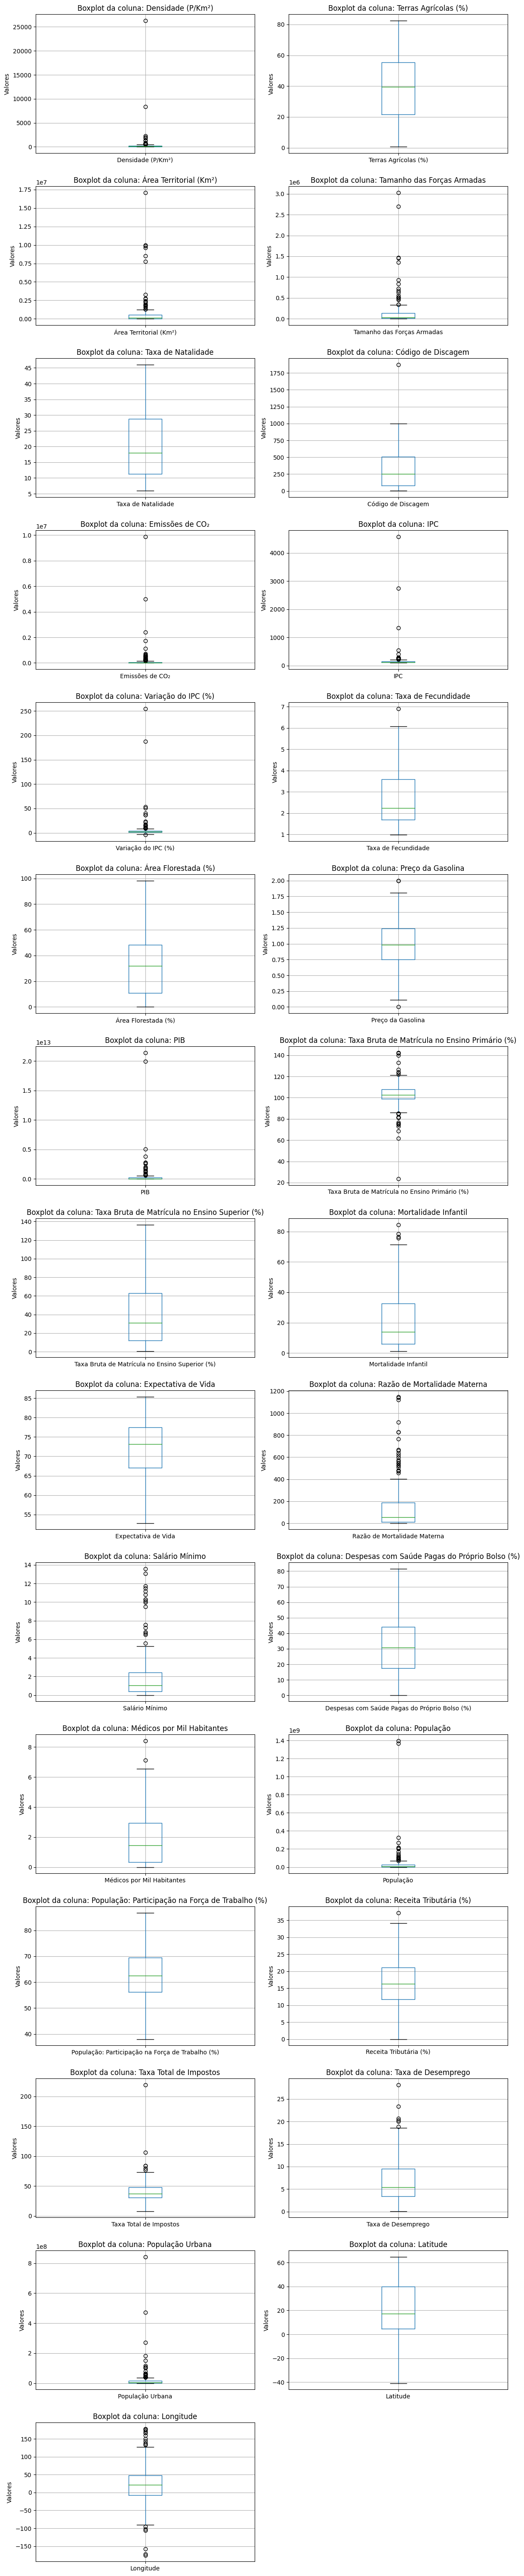

In [133]:
# Chamada da função para plotar os boxplots
boxplots(df_numerico, 2, (12,4))

A partir dessa representação, algumas informações podem ser destacadas:


*   Conforme identificado no resumo estatístico anteriormente, se verificam outliers bem distantes das medianas nos atributos: Densidade (P/km²), Área Territorial, Tamanho das Forças Armadas, Emissões de CO₂, IPC, Variação do IPC (%), PIB, Taxa Bruta de Matrícula no Ensino Primário (%), Razão da Mortalidade Materna, Salário Mínimo, Taxa de Desemprego, População, População Urbana e Longitude.
*   No caso da Longitude, esses outliers são considerados valores válidos pois muitos países estão localizados bem distantes do meridiano central de referência.
*   A densidade populacional possui dois outliers bem destacados. Provavelmente associada a países com áreas pequenas e populações (urbana e total) altas.
*  Alguns países possuem área territorial bem expressiva comparados à maioria. Em problemas nos quais esse atributo é considerado, uma transformação logarítmica pode ser necessária para proporcionar melhor análise. Essa mesma ideia pode ser aplicada nos atributos que também apresentam outliers destacados e estão listados acima.
*   De todo modo, é necessária atenção nessa transformação em alguns casos pois dependendo do objetivo da análise, transformar esses outliers destacados pode reduzir o impacto desses valores discrepantes em cenários nos quais essa redução é prejudicial ao processo de análise.

Após a construção dos bloxplots, é gerada uma matriz de correlação de Pearson, onde são representados os graus de correlação linear entre as variáveis númericos do dataframe. A partir da observação e análise, algumas informações podem ser extraídas.







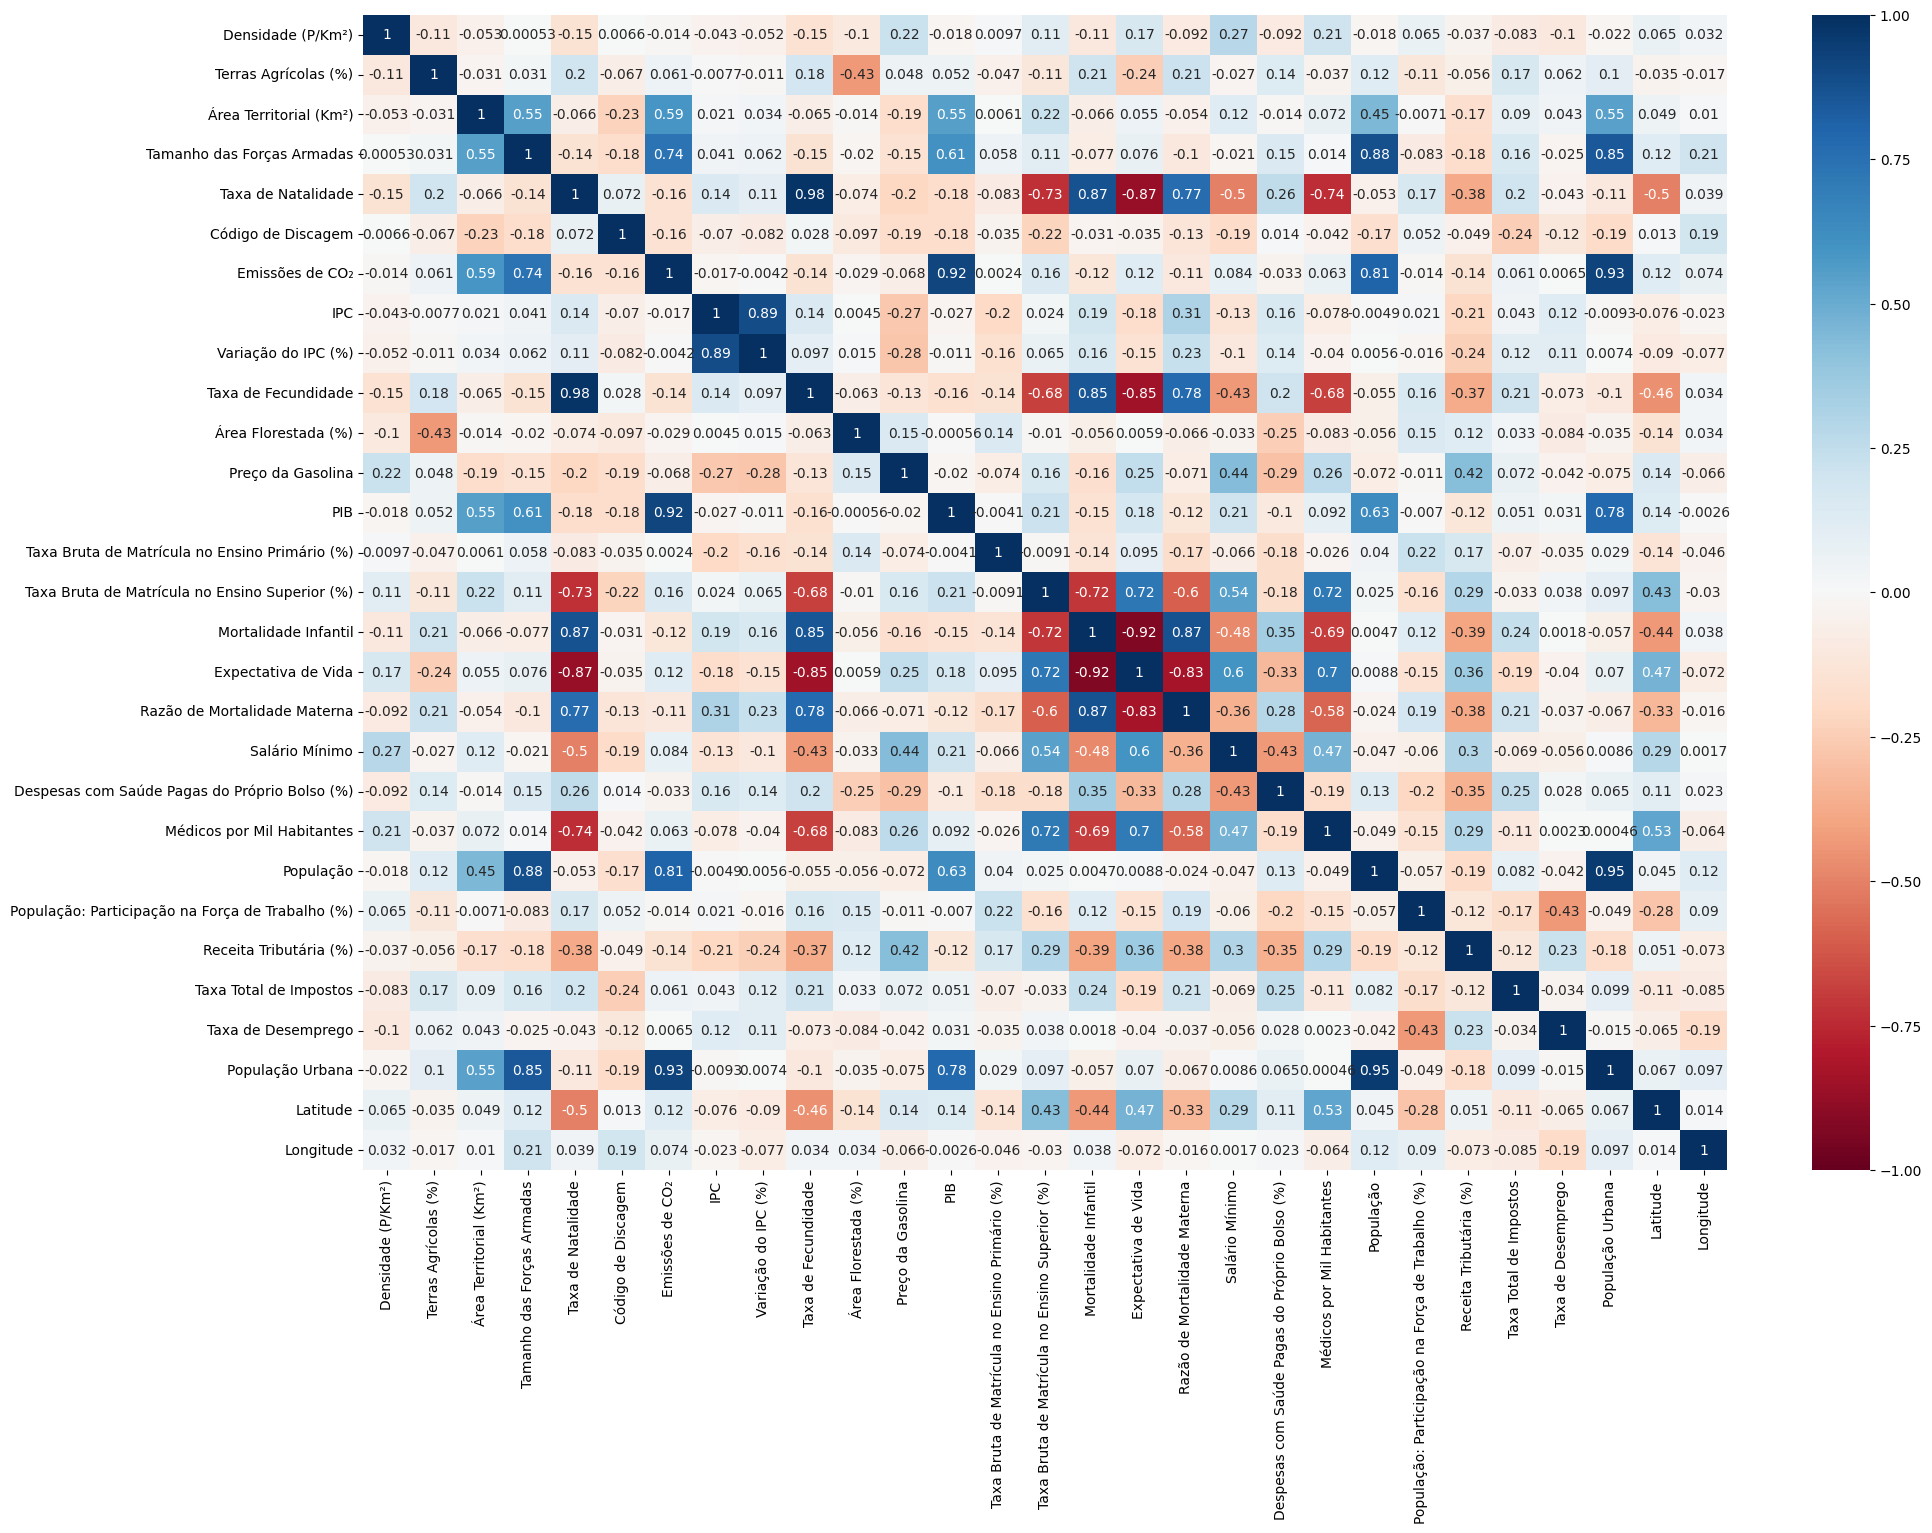

In [134]:
# Gerando a nova matriz de correlação de Pearson
plt.figure(figsize = (22,15))
sb.heatmap(df_numerico.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

É possível identificar algumas fortes correlações envolvendo alguns atríbutos específicos. Com base nessa observação inicial, uma decisão foi tomada e toda a motivação para tal é explicada a seguir.

## Definição dos elementos de análise

A partir de uma exploração inicial dos dados, surgiu a idéia de explorar um conjunto específico de dados para descobrir relações e informações a partir dos mesmos. A análise será baseada em entender as relações entre os indíces dos atributos relacionados à área da saúde. A motivação foi gerada por identificar fortes correlações envolvendo esses atributos, o que pode proporcionar a obtenção de informações importantes sobre os mesmos. Em função disso, todos os tratamentos nos dados serão realizados de modo a facilitar a análise desses índices.
A primeira etapa dessse processo consiste em selecionar as colunas com os atributos relacionados à objetivo da análise. Em seguida, serão identificados os valores nulos nos atributos do dataframe e, a partir disso, será realizado um tratamento dos mesmos.

In [135]:
# salvando um novo dataframe para análise conforme definido

# recuperando os nomes das colunas
col = list(dataframe.columns)

# o novo dataframe irá conter todas as colunas do dataframe original
novo_df = dataframe[col[:]]

# Eliminando do dataframe as colunas com os índices que não serão considerados
novo_df.drop(
    [
        "Abreviação",
        "Terras Agrícolas (%)",
        "Tamanho das Forças Armadas",
        "Código de Discagem",
        "Emissões de CO₂",
        "Preço da Gasolina",
        "IPC",
        "Variação do IPC (%)",
        "Taxa Bruta de Matrícula no Ensino Primário (%)",
        "Taxa Bruta de Matrícula no Ensino Superior (%)",
        "Salário Mínimo",
        "Despesas com Saúde Pagas do Próprio Bolso (%)",
        "Maior Cidade",
        "Idioma Oficial",
        "Taxa Total de Impostos",
        "População: Participação na Força de Trabalho (%)",
        "Capital/Cidade Principal",
        "Taxa de Desemprego",
        "Código da Moeda",
        "Área Florestada (%)",
        "Receita Tributária (%)"
    ],
    axis=1,
    inplace=True
)

# Exibindo o dataframe a ser analisado
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   País                          195 non-null    object 
 1   Densidade (P/Km²)             195 non-null    Int64  
 2   Área Territorial (Km²)        194 non-null    Int64  
 3   Taxa de Natalidade            189 non-null    float64
 4   Taxa de Fecundidade           188 non-null    float64
 5   PIB                           193 non-null    Int64  
 6   Mortalidade Infantil          189 non-null    float64
 7   Expectativa de Vida           187 non-null    float64
 8   Razão de Mortalidade Materna  181 non-null    Int64  
 9   Médicos por Mil Habitantes    188 non-null    float64
 10  População                     194 non-null    Int64  
 11  População Urbana              190 non-null    Int64  
 12  Latitude                      194 non-null    float64
 13  Longi

Com a realização desse filtro inicial nos dados, é gerada uma matriz de correlação de Pearson para entender o grau de correlação linear entre as variáveis.

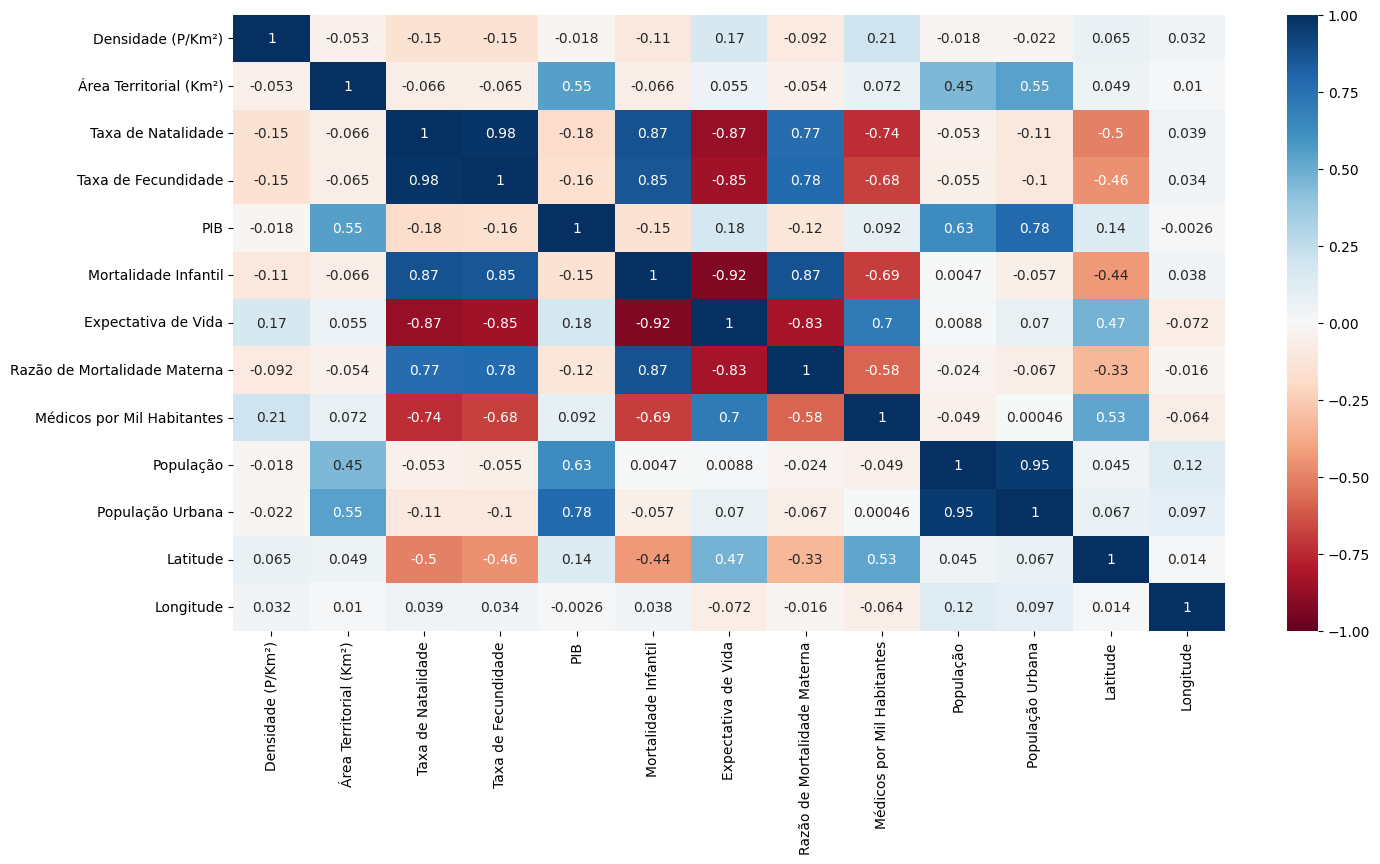

In [136]:
# Criando um novo dataframe somente com as colunas com dados númericos
df_numerico = remover_colunas_object(novo_df)

# Gerando a matriz de correlação
plt.figure(figsize = (16,8))
sb.heatmap(df_numerico.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

Algumas correlações bem significativas entre alguns atributos serão destacadas a seguir:
*   A Taxa de Natalidade possui uma correlação positiva muito forte com a Taxa de Fecundidade (0.98), com a Mortalidade Infantil (0.87) e com a Razão de Mortalidade Materna (0.76). As duas primeiras podem ser consideradas verdadeiras pois os dados não possuem outliers de destaque que distorceriam a interpretação. Entretano, a Razão de Mortalidade Materna possui alguns outliers que podem estar distorcendo essa análise de relação linear entre as variáveis;
*   A Taxa de Natalidade também possui uma correlação negativa forte com a Expectativa de Vida (-0.87) e com Médicos por Mil Habitantes (-0.74). São informações que devem ser consideradas também pois a distribuição dos dados não possuem outliers que sejam responsáveis por distorcer a relação para uma tendência específica.
*   Importante destacar também algumas fortes correlações envolvendo o atributo Expectativa de Vida. Enquanto fatores como Taxa de Natalidade, Taxa de Fecundidade e Mortalidade Infantil apresentam correlação negativa, o atributo de Médicos por Mil Habitantes apresenta correlação positiva.
*   Uma correlação média positiva da Latitude com a Expectativa de Vida e com Médicos por Mil Habitantes significa que esses indíces tendem a ser maiores nos países do Hemisfério Norte.
*   As correlações envolvendo os atributos Área Territorial, PIB, População e População Urbana podem não representar uma relação de causalidade devido a presença de alguns outliers bem destacados na suas respetivas distruibuições de dados. Outras análises são necessárias para entender as relações com as outras variáveis.






Após a análise das correlações, algumas análises serão realizadas para compreender as distribuições dos atributos.

Para ser possível realizar análises atráves de gráficos de dispersão, serão realizados inicialmente alguns tratamentos nos dados em relação aos valores nulos, de forma que seja possível utilizar esse tipo de representação gráfica sem erro na execução do código.



São verificados os valores nulos de cada atributo do dataframe de análise. O tratamento desses valores será realizado após essa verificação.

In [137]:
# Verificando nulls no dataset
novo_df.isnull().sum()

,0
País,0
Densidade (P/Km²),0
Área Territorial (Km²),1
Taxa de Natalidade,6
Taxa de Fecundidade,7
PIB,2
Mortalidade Infantil,6
Expectativa de Vida,8
Razão de Mortalidade Materna,14
Médicos por Mil Habitantes,7


Além desse sumário de valores nulos, uma matriz de visualização pode ser construída de forma a facilitar a visualizar os valores faltantes ou nulos no dataframe.



<Axes: >

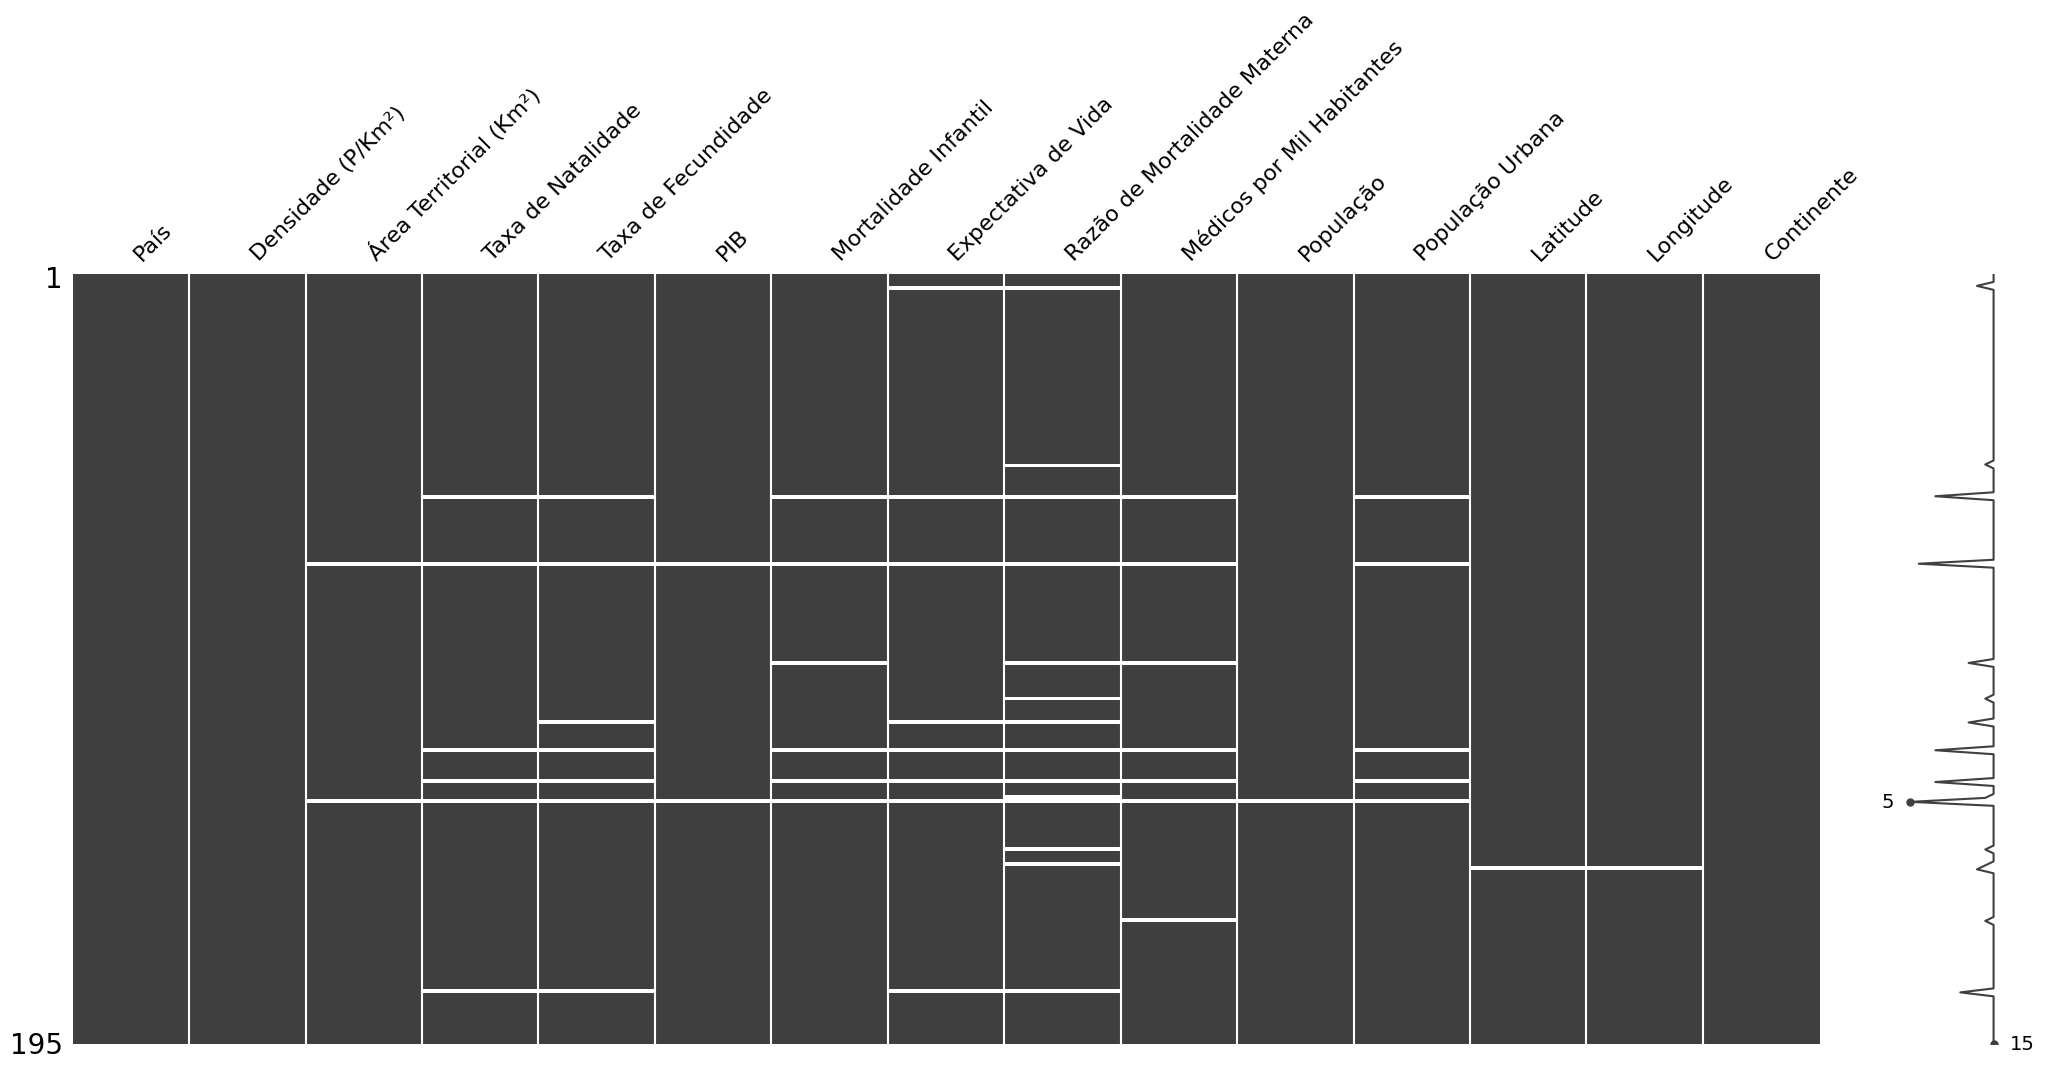

In [138]:
# substituindo os zeros por NaN
novo_df.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(novo_df)

In [139]:
# verificando novamente nulls no dataframe
novo_df.isnull().sum()

,0
País,0
Densidade (P/Km²),0
Área Territorial (Km²),2
Taxa de Natalidade,6
Taxa de Fecundidade,7
PIB,2
Mortalidade Infantil,6
Expectativa de Vida,8
Razão de Mortalidade Materna,14
Médicos por Mil Habitantes,7


Somente o atributo "Área Territorial (km²) teve um valor nulo adicionado. O restante dos nulos já estava como na verificação anterior.

Com base nessas visualizações, foi tomada a decisão de excluir do dataframe colunas com um número relativamente alto de valores nulos ou faltantes. O critério adotado em relação aos dados não nulos foi de que as colunas precisam ter pelo menos 90% dos dados e as linhas precisam ter pelo menos 70%. O código a seguir aplica essa transformação.

<Axes: >

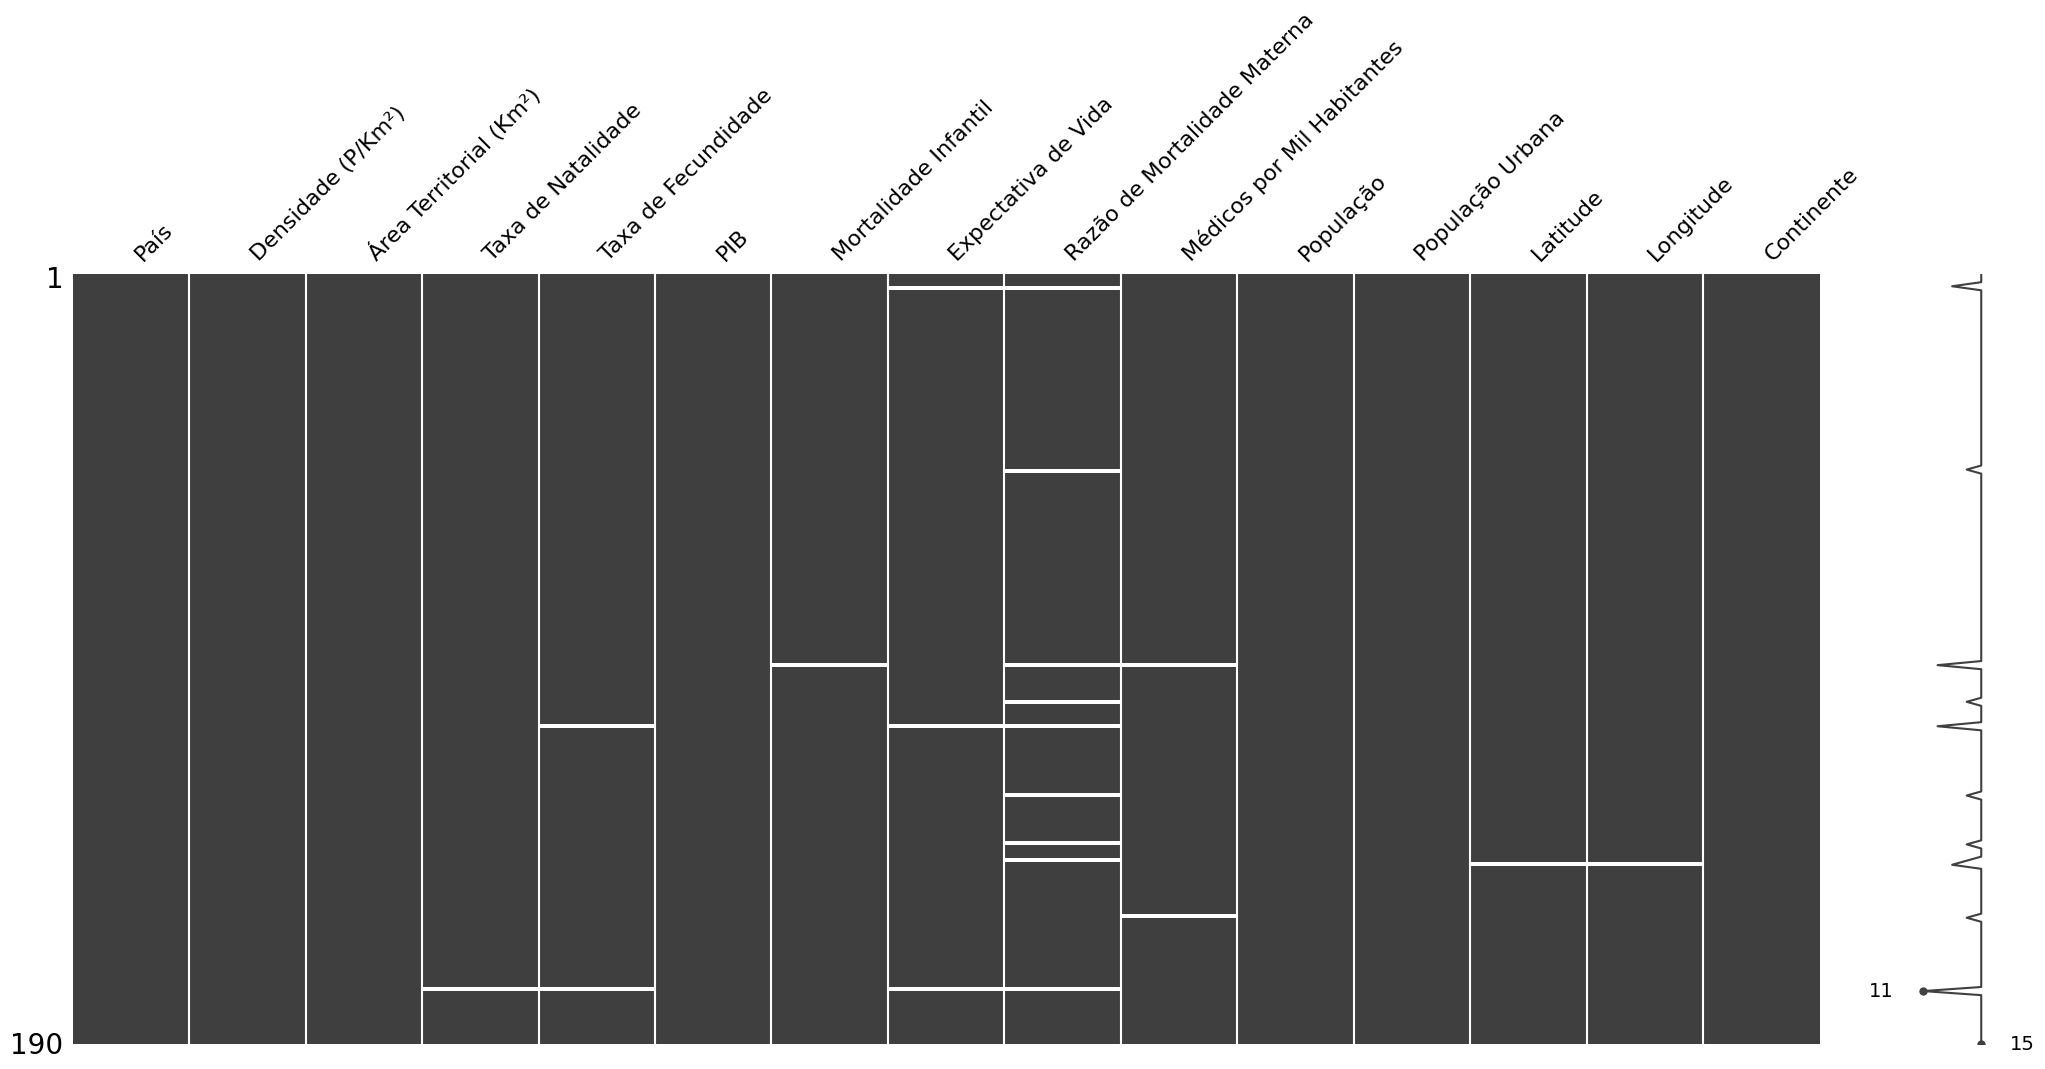

In [140]:
# Removendo linhas e colunas com valores nulos de acordo com o critério definido
novo_df = remove_nulos(novo_df)

# Exibindo visualização matricial da nulidade do dataframe resultante
ms.matrix(novo_df)

Verificou-se que o atributo "Salário Mínimo" foi excluído da análise pela quantidade de valores nulos registrados. Também foram excluídos oito países da lista de acordo com o critério utilizado.

A seguir, serão realizados os tratamentos para os valores nulos nos atributos restantes, de forma que todos tenham valores compatíveis para posterior análise. Foi definido o critério de que os valores serão substituídos pelas medianas das respectivas colunas.

<Axes: >

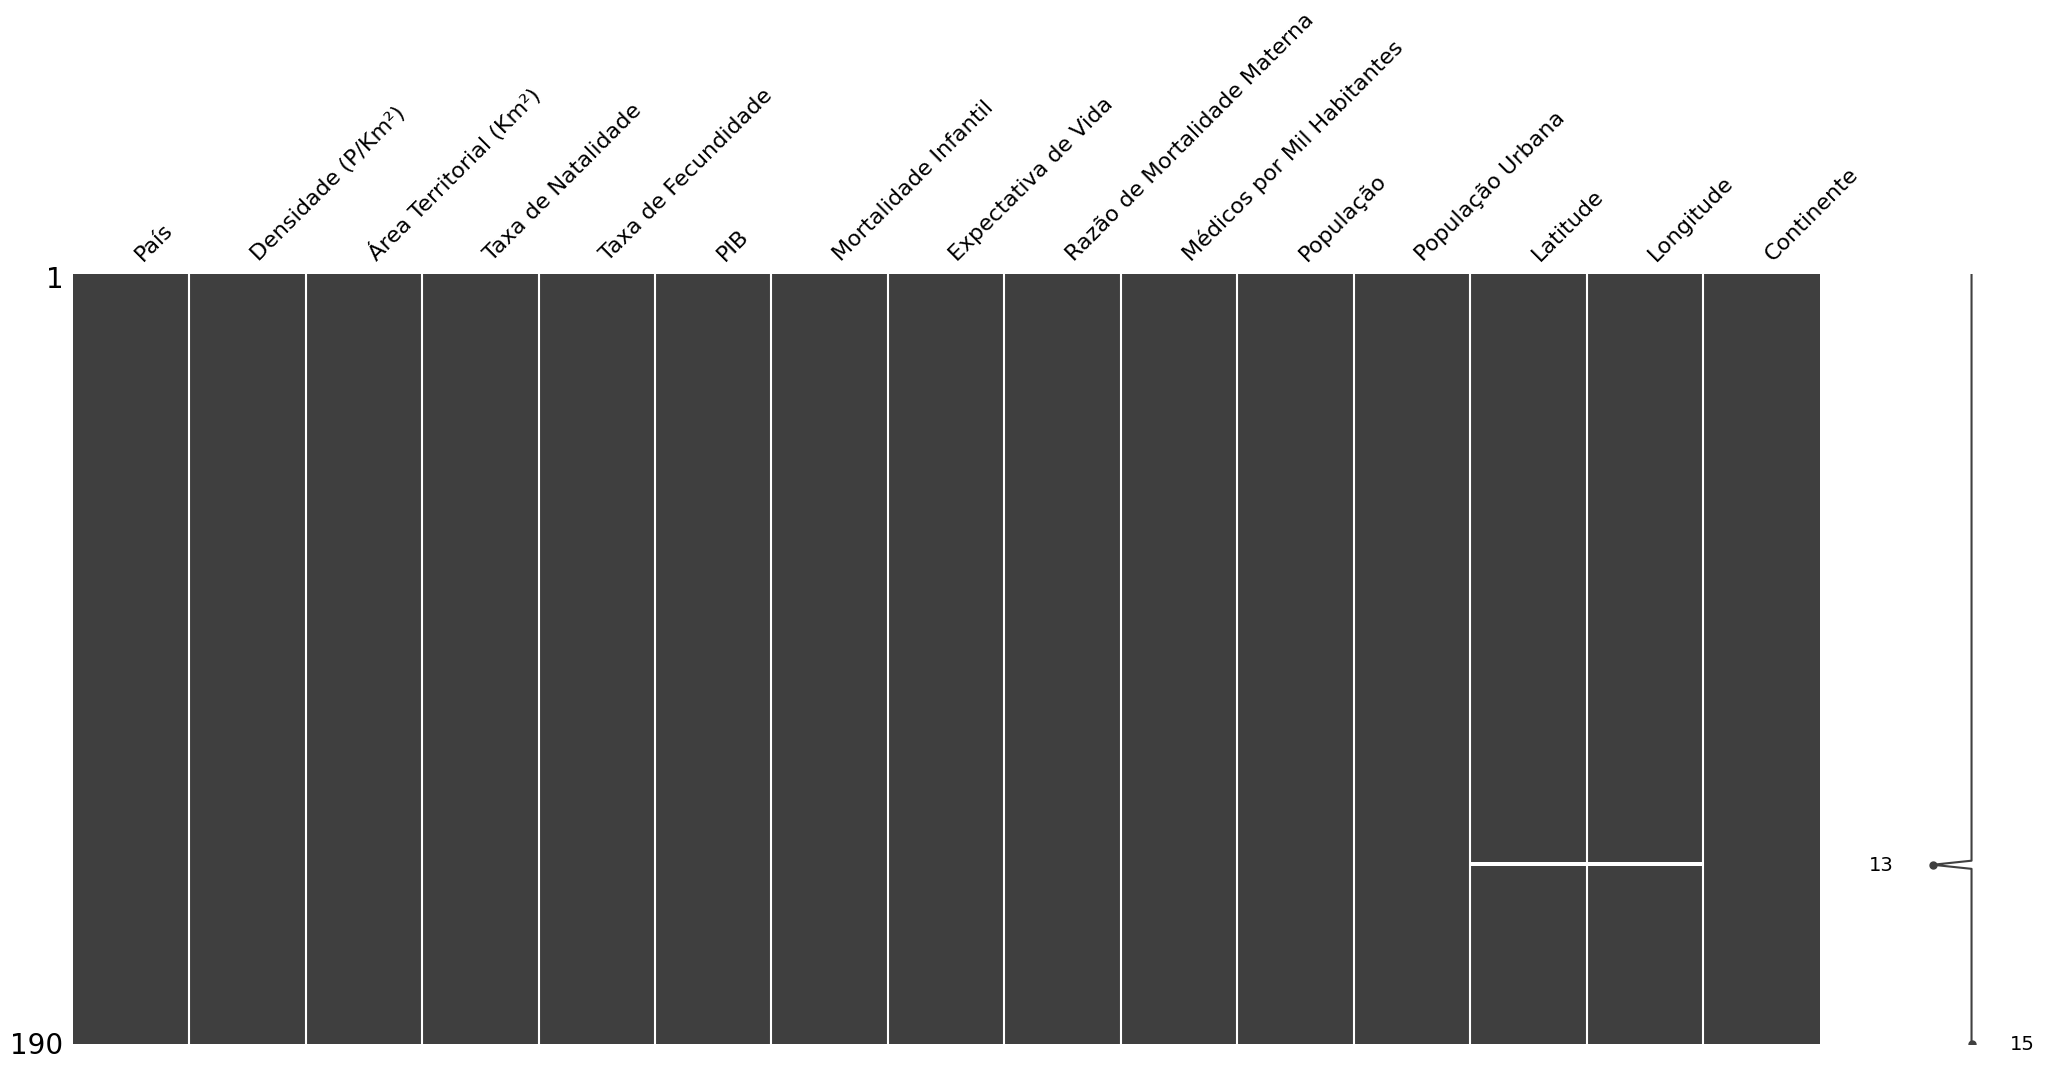

In [141]:
# Substituindo os NaN pela mediana das respectivas colunas
novo_df['Taxa de Natalidade'].fillna(novo_df['Taxa de Natalidade'].median(), inplace=True)
novo_df['Taxa de Fecundidade'].fillna(novo_df['Taxa de Fecundidade'].median(), inplace=True)
novo_df['Mortalidade Infantil'].fillna(novo_df['Mortalidade Infantil'].median(), inplace=True)
novo_df['Expectativa de Vida'].fillna(novo_df['Expectativa de Vida'].median(), inplace=True)
novo_df['Razão de Mortalidade Materna'].fillna(novo_df['Razão de Mortalidade Materna'].median(), inplace=True)
novo_df['Médicos por Mil Habitantes'].fillna(novo_df['Médicos por Mil Habitantes'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(novo_df)

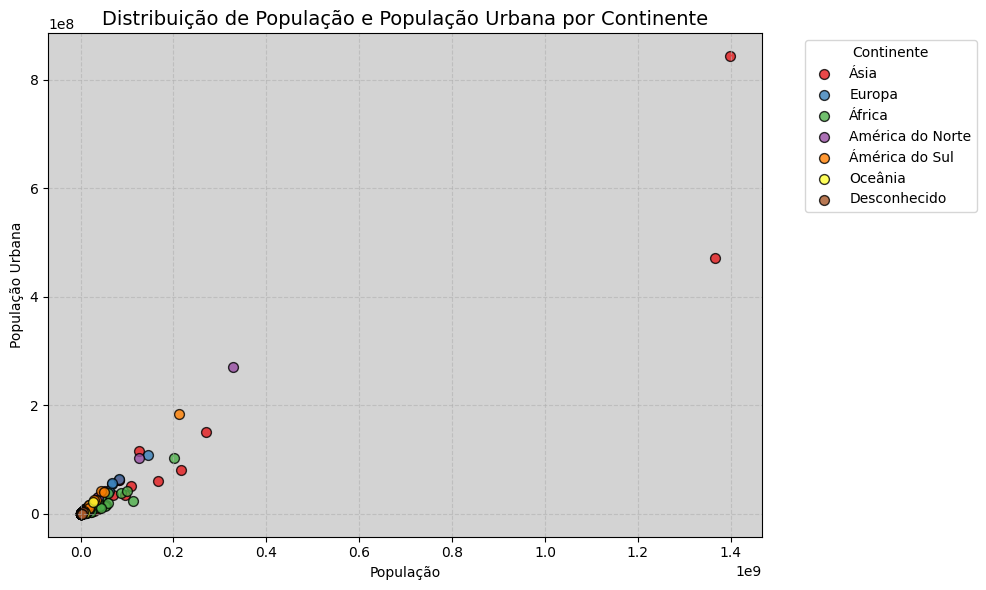

In [142]:
# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df, 'População', 'População Urbana', 'Continente',  (10, 6), 50, 'lightgray')

Dois outliers se destacam muito nessa representação gráfica. Como ambos pertecem a continente asiático, pressupõem por conhecimento prévio que representam a China e a Índia, os dois países mais populosos do mundo. De forma a entender melhor a distribuição nos outros países, a escala dos atributos é transformada para a escala logarítmica.

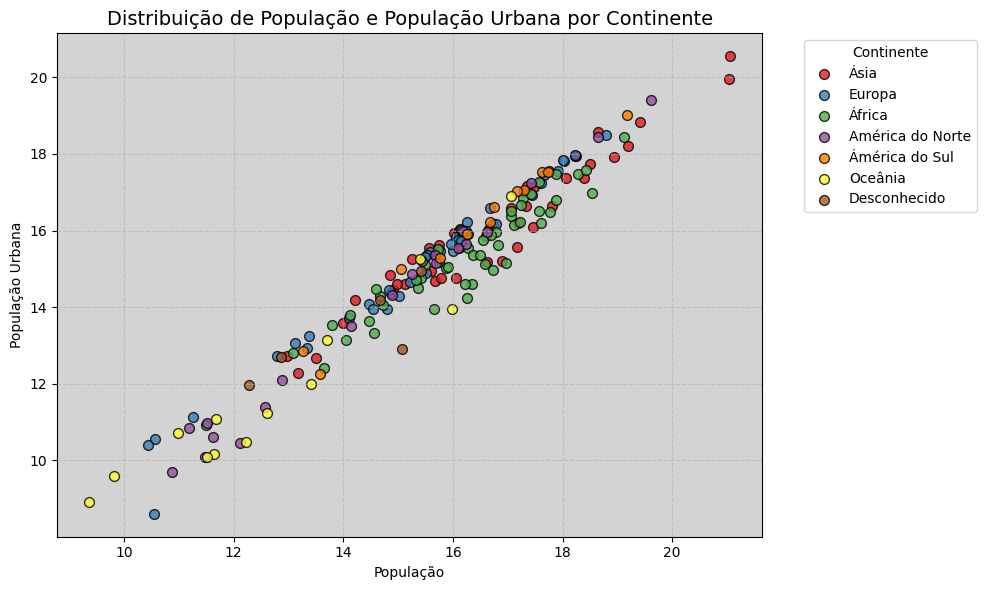

In [143]:
# Transformando as escalas das colunas de atributos com faixa de valores muito elevada
novo_df_transformado = transforma_para_log(novo_df, ['População','População Urbana'])

# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df_transformado, 'População', 'População Urbana', 'Continente', (10, 6), 50, 'lightgray')

Pode-se extrair algumas informações. Os países da Oceania e alguns da América do Norte estão no grupo dos menos populosos do mundo. Nota-se alguns países europeus nesse grupo também.

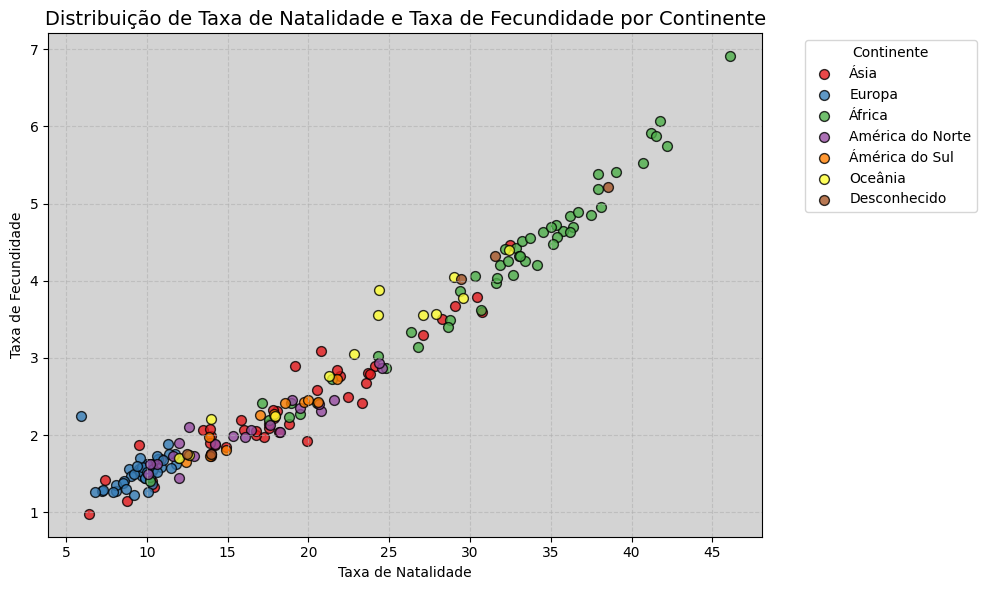

In [144]:
# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df, 'Taxa de Natalidade', 'Taxa de Fecundidade', 'Continente',  (10, 6), 50, 'lightgray')

Esses dois indíces possuem correlação linear quase igual 1. Destaca-se que na Europa ambos são índices baixos, verificando elevados valores no continente africano. Apesar dsses altos índices na África, o gráfico populacional mostrado anteriormente não registra os países africanos com as maiores populações, logo algum fator pode ser responsável para explicar esse comportamento. Uma análise da dispersão de Mortalidade Infantil e Expectativa de Vida a seguir pode contrinuir nessa análise.

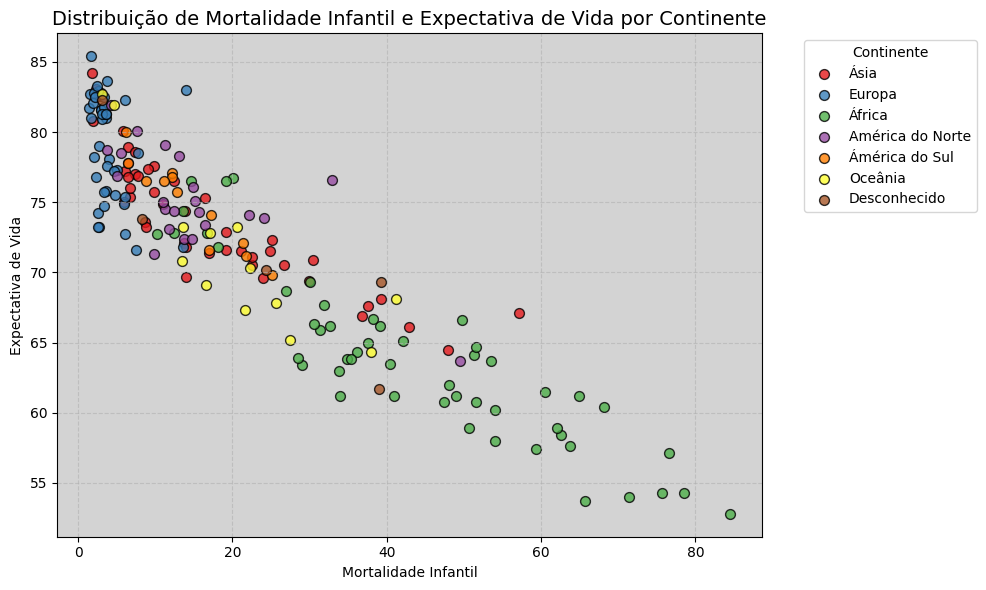

In [145]:
# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df, 'Mortalidade Infantil', 'Expectativa de Vida', 'Continente', (10, 6), 50, 'lightgray')

Pode-se identificar que mesmo índices com altos de natalidade e fecundidade, o continente africano é o que registra os índices mais preocupantes de mortalidade infantil e expectativa de vida. Isso explica o fato da população do continente africano não registrar os maiores números absolutos e proporcionais em virtude de uma alta mortalide infantil e baixa expectativa de vida.

A seguir, a expectativa de vida será comparada com o número de médicos por mil habitantes e essa dispersão poderá trazer algumas informações adicionais.

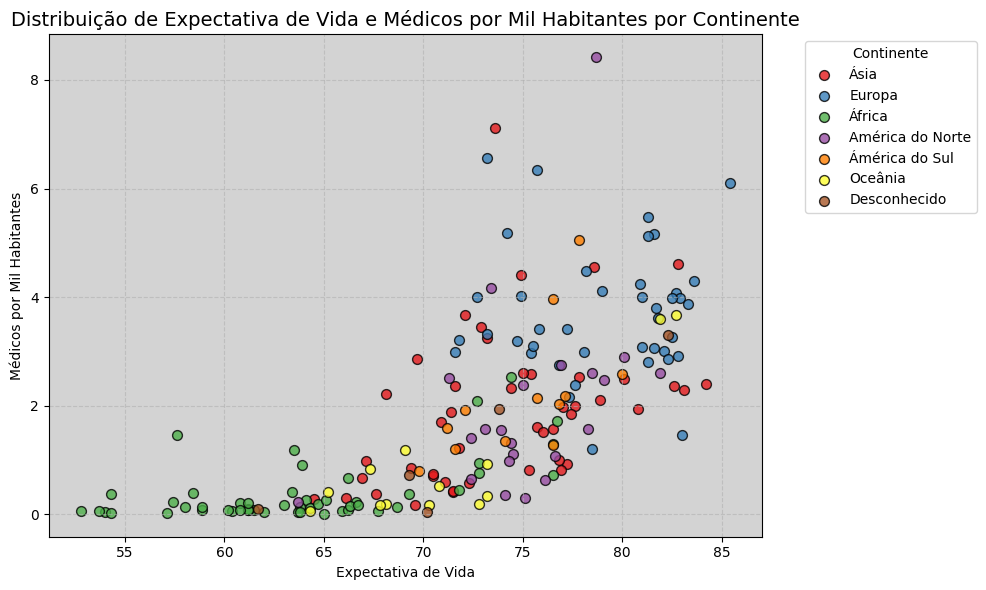

In [146]:
# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df, 'Expectativa de Vida', 'Médicos por Mil Habitantes', 'Continente', (10, 6), 50, 'lightgray')

O número de Médicos por Mil Habitantes é um dos fatores de contribuição para uma alta expectativa de vida no continente europeu. No continente africano é um índice que reflete a baixa expectativa de vida mas não é o único que justifica isso pois muitos outros países posseum valores baixo nesse índice mas uma expectativa de vida maior em comparação.  

O próximo gráfico será a dispersão dos índices de Médicos por Mil Habitantes e Razão de Mortalidade Materna. Nessa análise pode-se encontrar algumas informações adicionais dentro dessa linha de análise.

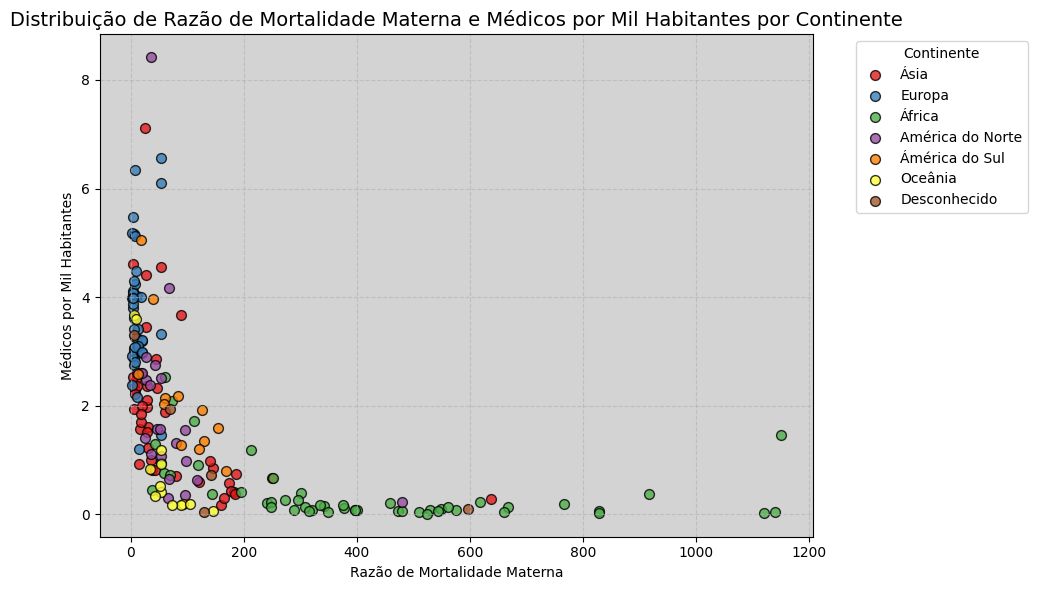

In [147]:
# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df, 'Razão de Mortalidade Materna', 'Médicos por Mil Habitantes', 'Continente', (10, 6), 50, 'lightgray')

Pela análise dessa distribuição, pode-se verificar de forma clara que um número baixo de Médicos por Mil Habitantes está relacionado a uma Alta Razão de Mortalidade Materna, com países africanos destacados nessa situação crítica. Além disso, muitos países com números relativamente baixos de médicos ainda sim possuem baixa razão de mortalidade materna, concluindo-se desse modo que o número de médicos não é suficente para justificar a variação do outro atributo diretamente. Outras análises precisam ser realizadas para identificar causas para esse problema.

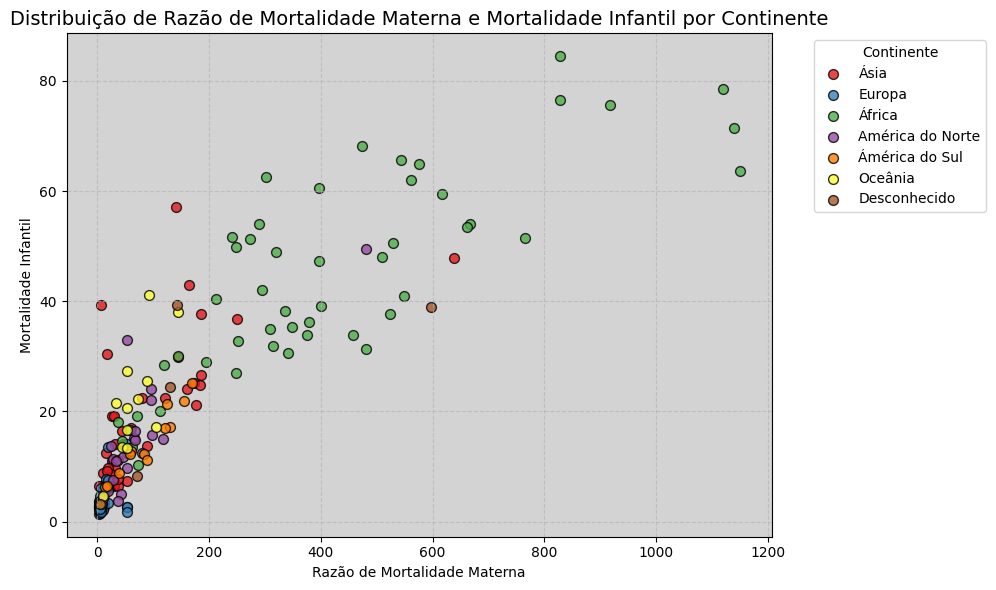

In [148]:
# Chamando a função para plotar um gráfico de dispersão entre os índices selecionados
plot_dispersao(novo_df, 'Razão de Mortalidade Materna', 'Mortalidade Infantil', 'Continente', (10, 6), 50, 'lightgray')

Essa dispersão mostra um novo cenário e explica algumas questões levantadas nas análises dos gráficos anteriores. Os outliers estão bem destacados e localizados no continente africano. Ainda se identificam dois países localizados na Ásia e na Ámerica do Norte dentro desses valores elevados.


Com base nas análises de dispersão, serão destacados a seguir os 20 países com maior Razão de Mortalidade Materna. Essa análise irá enteder o comportamento dos outliers em relação a outros valores e também localizar onde esse índice é mais crítico.

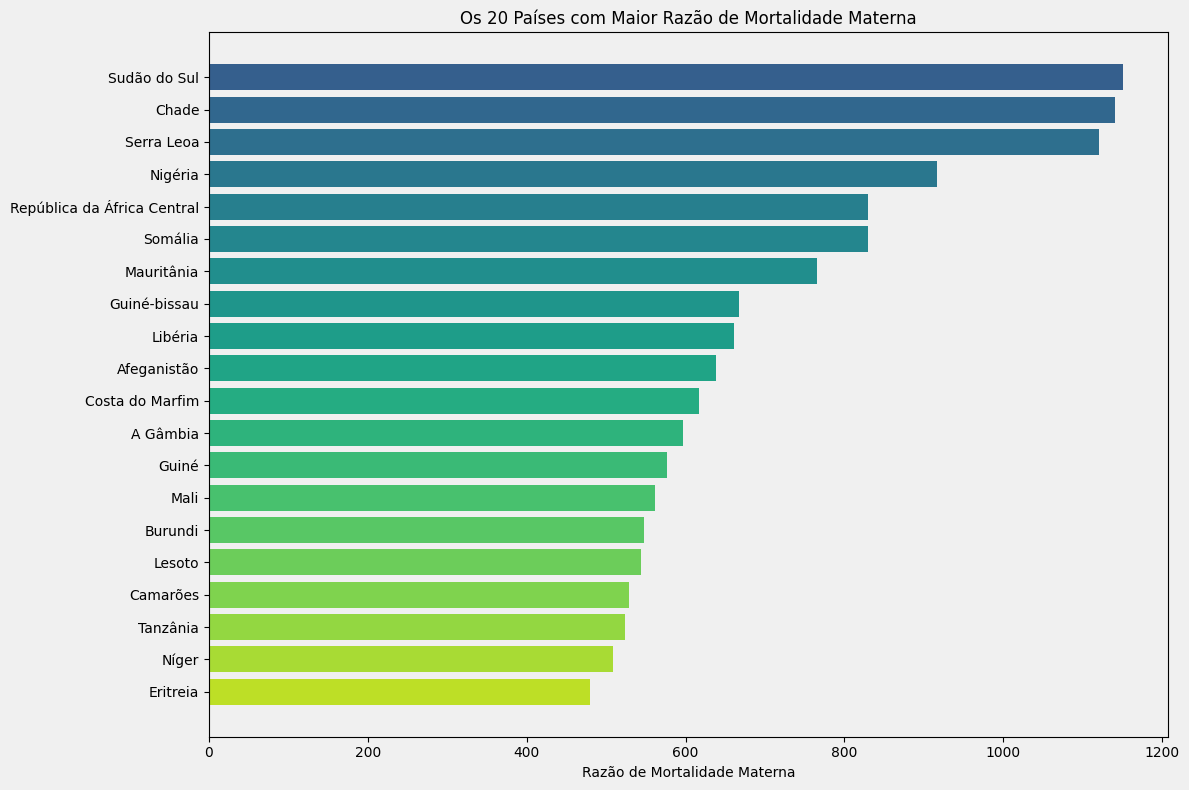

In [149]:
# Plotando o gráfico de barras
barras_ordenadas(novo_df, 'Razão de Mortalidade Materna', 20, 'maior', '#f0f0f0')

Somente o Afeganistão não está localizado no continente africano. Fatores como guerras e condições de saúde locais contribuem para tal. A seguir é carregado um mapa indicando a localização desses países e confirmando que quase todos estão localizados na África Sub Saariana.

In [150]:
# Gerando o mapa com a indicação dos 20 países com maiores razões de mortalidade materna
mapa = mapa_paises(novo_df, 'Razão de Mortalidade Materna', 20, 3, 'maiores')

# Exibindo o mapa
mapa


A aseguir

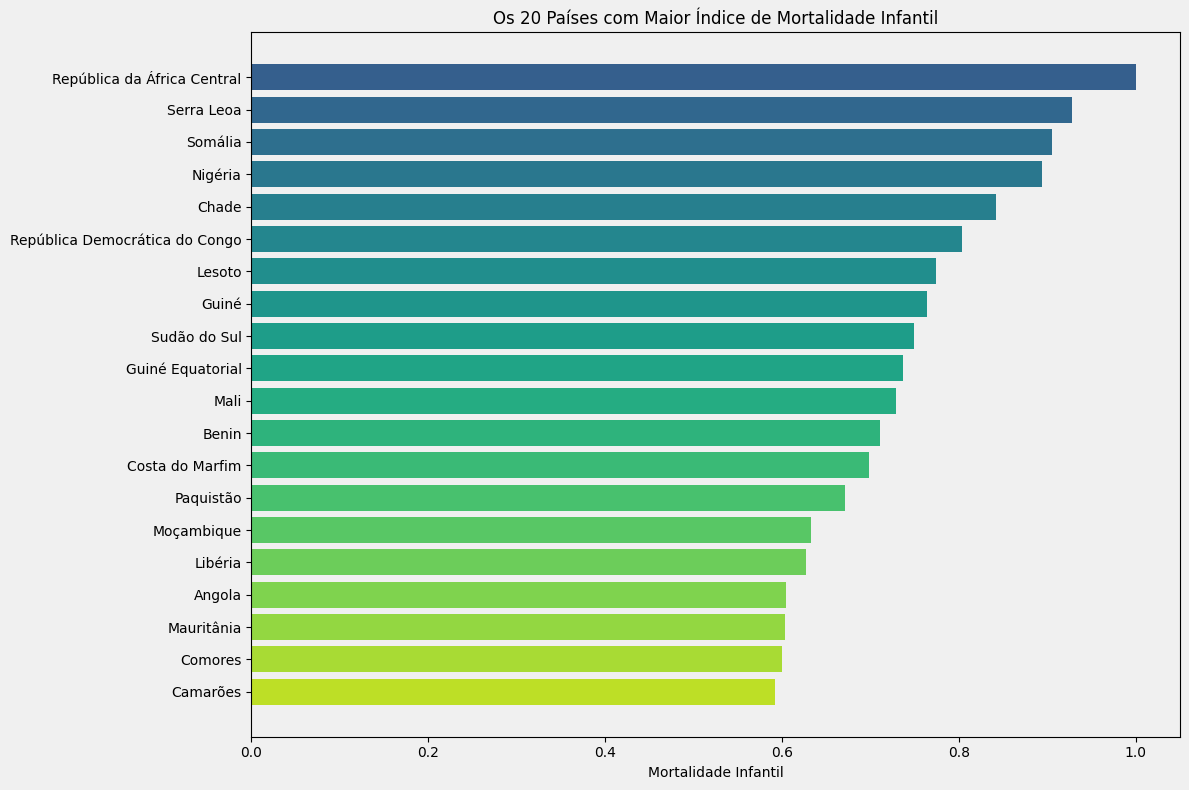

In [161]:
# Plotando o gráfico de barras
barras_ordenadas(novo_df, 'Mortalidade Infantil', 20, 'maior', '#f0f0f0')



A seguir, são representados os países com o menor número de Médicos por Mil Habitantes. É possível que um mesmo país esteja representado também nessa lista.

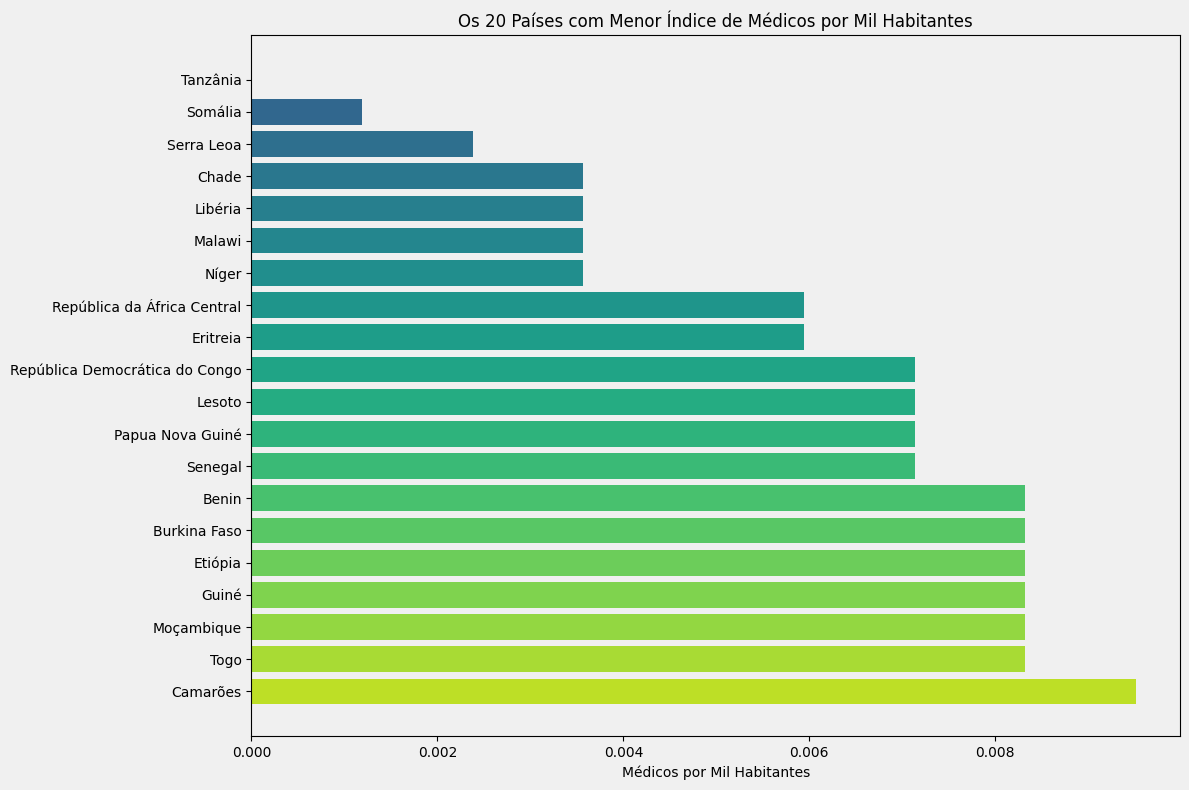

In [162]:
# Plotando o gráfico de barras
barras_ordenadas(novo_df, 'Médicos por Mil Habitantes', 20, 'menor', '#f0f0f0')

Foi verificado um país cujo nome apresentou caractertes não reconhecidos. Apesar dos dados desse país ser relevante, a não identificação do mesmo pode prejudicar na análise e posterior decisão na adoção de políticas públicas de melhoria desse índice. Um ponto de verificação seria confirmar se o mesmo possui dados de latitude e longitude registrados. Se os dados forem válidos, basta conferir a localização num código carregado de um mapa e encontrar a sua localização.

In [153]:
# Chamando a função que verifica a condição
verifica_coordenadas(novo_df)

Países com latitude ou longitude inválidas:
S�����������


Como não foi possível identificar a localização do país, ele será retirado da análise conforme justificado anteriormente.

In [154]:
# Aplicando o filtro de dados válidos no DataFrame
novo_df = filtra_dados(novo_df)

# Listando os 15 países com os piores índices de médicos por mil habitantes
top_20_menor_medicos = selecionados (novo_df, 20, 'Médicos por Mil Habitantes')

# Exibindo a lista dos países
print(top_20_menor_medicos)


                               País  Médicos por Mil Habitantes
172                        Tanzânia                        0.01
160                         Somália                        0.02
155                      Serra Leoa                        0.03
34                            Chade                        0.04
96                          Libéria                        0.04
102                          Malawi                        0.04
125                           Níger                        0.04
33      República da África Central                        0.06
54                         Eritreia                        0.06
45   República Democrática do Congo                        0.07
95                           Lesoto                        0.07
135                Papua Nova Guiné                        0.07
152                         Senegal                        0.07
18                            Benin                        0.08
26                     Burkina Faso     

Com o filtro realizado, Burkina Faso entrou na listagem determinada e os outros países permaneceram pois seus dados eram válidos.
A seguir, é gerado um mapa para localizar os 20 países com os menores índices de Médicos por Mil Habitantes.


In [155]:
# Gerando o mapa com a indicação dos 20 países com menores índices de Médicos por Mil Habitantes
mapa = mapa_paises(novo_df, 'Médicos por Mil Habitantes', 20, 3, 'menores')

# Exibindo o mapa
mapa

Um dos países aparece com o nome "Ir" e através da análise no mapa, identificou-se que o país é o Togo. Desse modo, foi identificado um erro na tradução e a seguir um código será utilizado para traduzir corretamente o nome do país.

In [156]:
# Tradução do nome específico do país
traducao_pais = {'Ir' : 'Togo'}
novo_df['País'] = novo_df['País'].replace(traducao_pais)

# Exibindo a lista dos países com nome do país corrigido no dataframe
print(top_20_menor_medicos)

                               País  Médicos por Mil Habitantes
172                        Tanzânia                        0.01
160                         Somália                        0.02
155                      Serra Leoa                        0.03
34                            Chade                        0.04
96                          Libéria                        0.04
102                          Malawi                        0.04
125                           Níger                        0.04
33      República da África Central                        0.06
54                         Eritreia                        0.06
45   República Democrática do Congo                        0.07
95                           Lesoto                        0.07
135                Papua Nova Guiné                        0.07
152                         Senegal                        0.07
18                            Benin                        0.08
26                     Burkina Faso     

## Definição do problema e pré-processamento dos dados

A partir das análises realizadas, surgiu a idéia de desenvolver um algoritmo de machine learning para realizar um agrupamento de países com características semelhantes em relação a esses índices de saúde analisados. Nesse caso, seria um problema de aprendizado não supervisionado, buscando padrões nos dados já fornecidos. Essa classificação permite uma melhor identificação das regiões e países mais afetados, de forma a possibilitar a adoção de políticas públicas e ações melhor direcionadas. Além disso, o modelo seria construído para ser aplicado em datasets com dados de períodos distindos (anual, semestral, trimestral).

O tratamente dos dados selecionados é realizado de forma que o algoritmo produza um resultado satisfatório.

Para entender melhor o modo como os dados estão distribuídos, são gerados histogramas e gráficos de distribuição de densidade (Density Plots) para os índices de saúde que demandaram atenção nessa análise. A análise dessa distribuição definirá como serão transformados os dados.

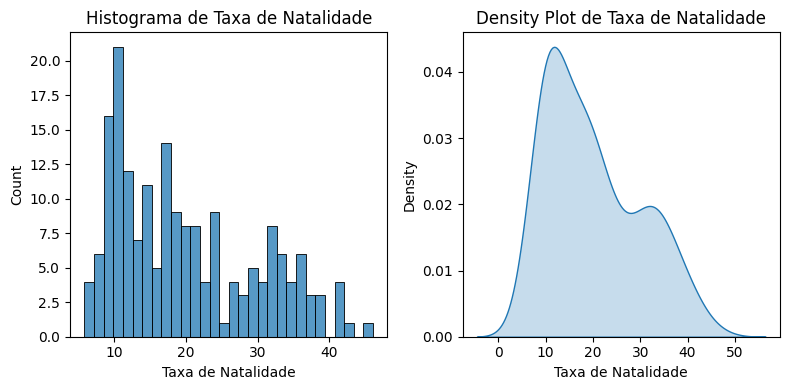

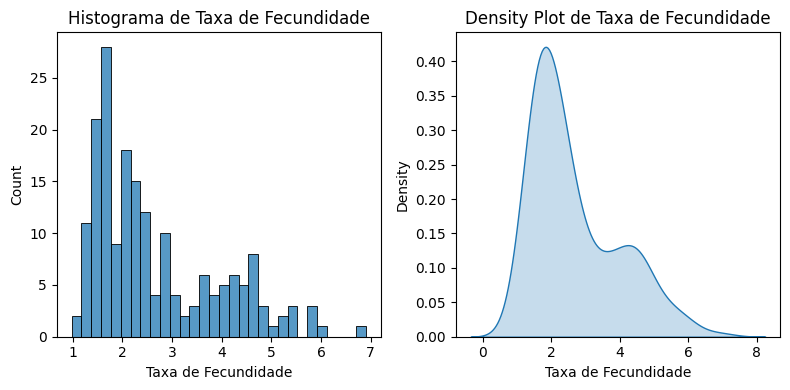

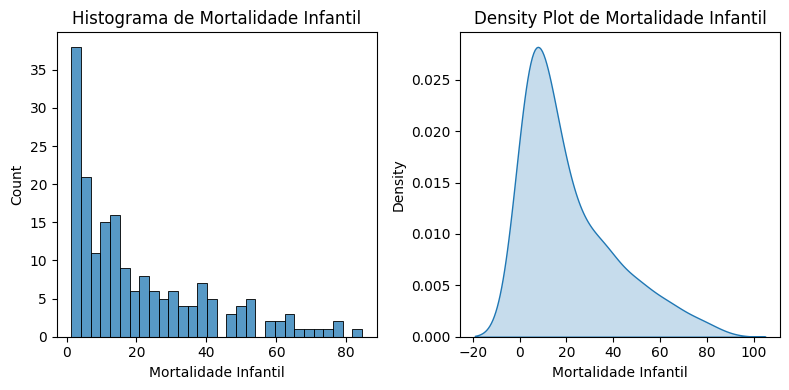

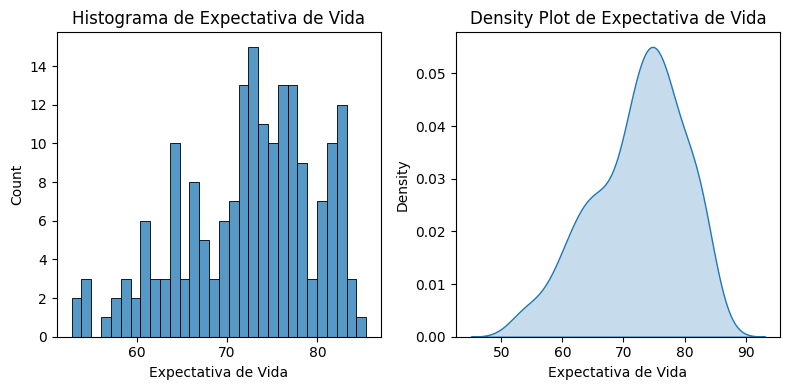

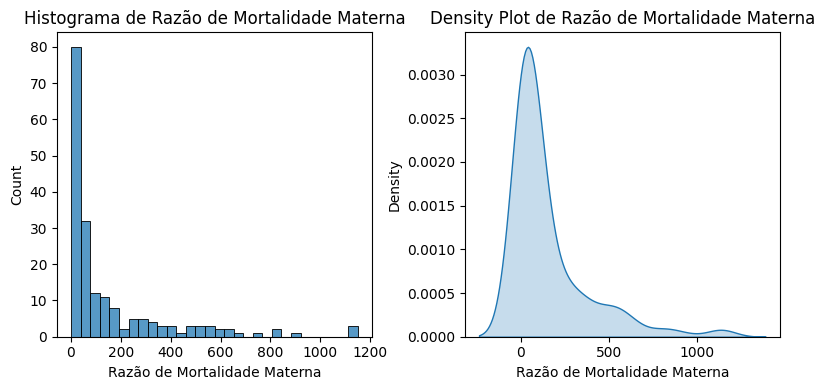

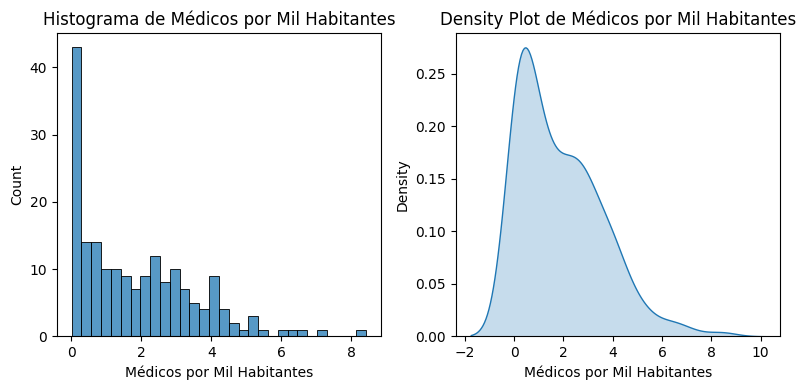

In [157]:
# Lista com os atributos exclusivos de saúde
colunas_saude = [
    'Taxa de Natalidade',
    'Taxa de Fecundidade',
    'Mortalidade Infantil',
    'Expectativa de Vida',
    'Razão de Mortalidade Materna',
    'Médicos por Mil Habitantes'
]

# Filtrando o DataFrame para manter apenas as colunas de saúde
df_saude = novo_df[colunas_saude]

# Criando histogramas e gráficos de distribuição de densidade para os atributos númericos
hist_density(df_saude)

É possível verificar que todos esses atributos possum distribuição normal assimétrica, desse modo será utilizado processo de normalização para as variáveis desses atributos.

Antes da realização dessa transformação, serão verificados os dados dos atributos selecionados em relação a presença de valores nulos ou missings.

<Axes: >

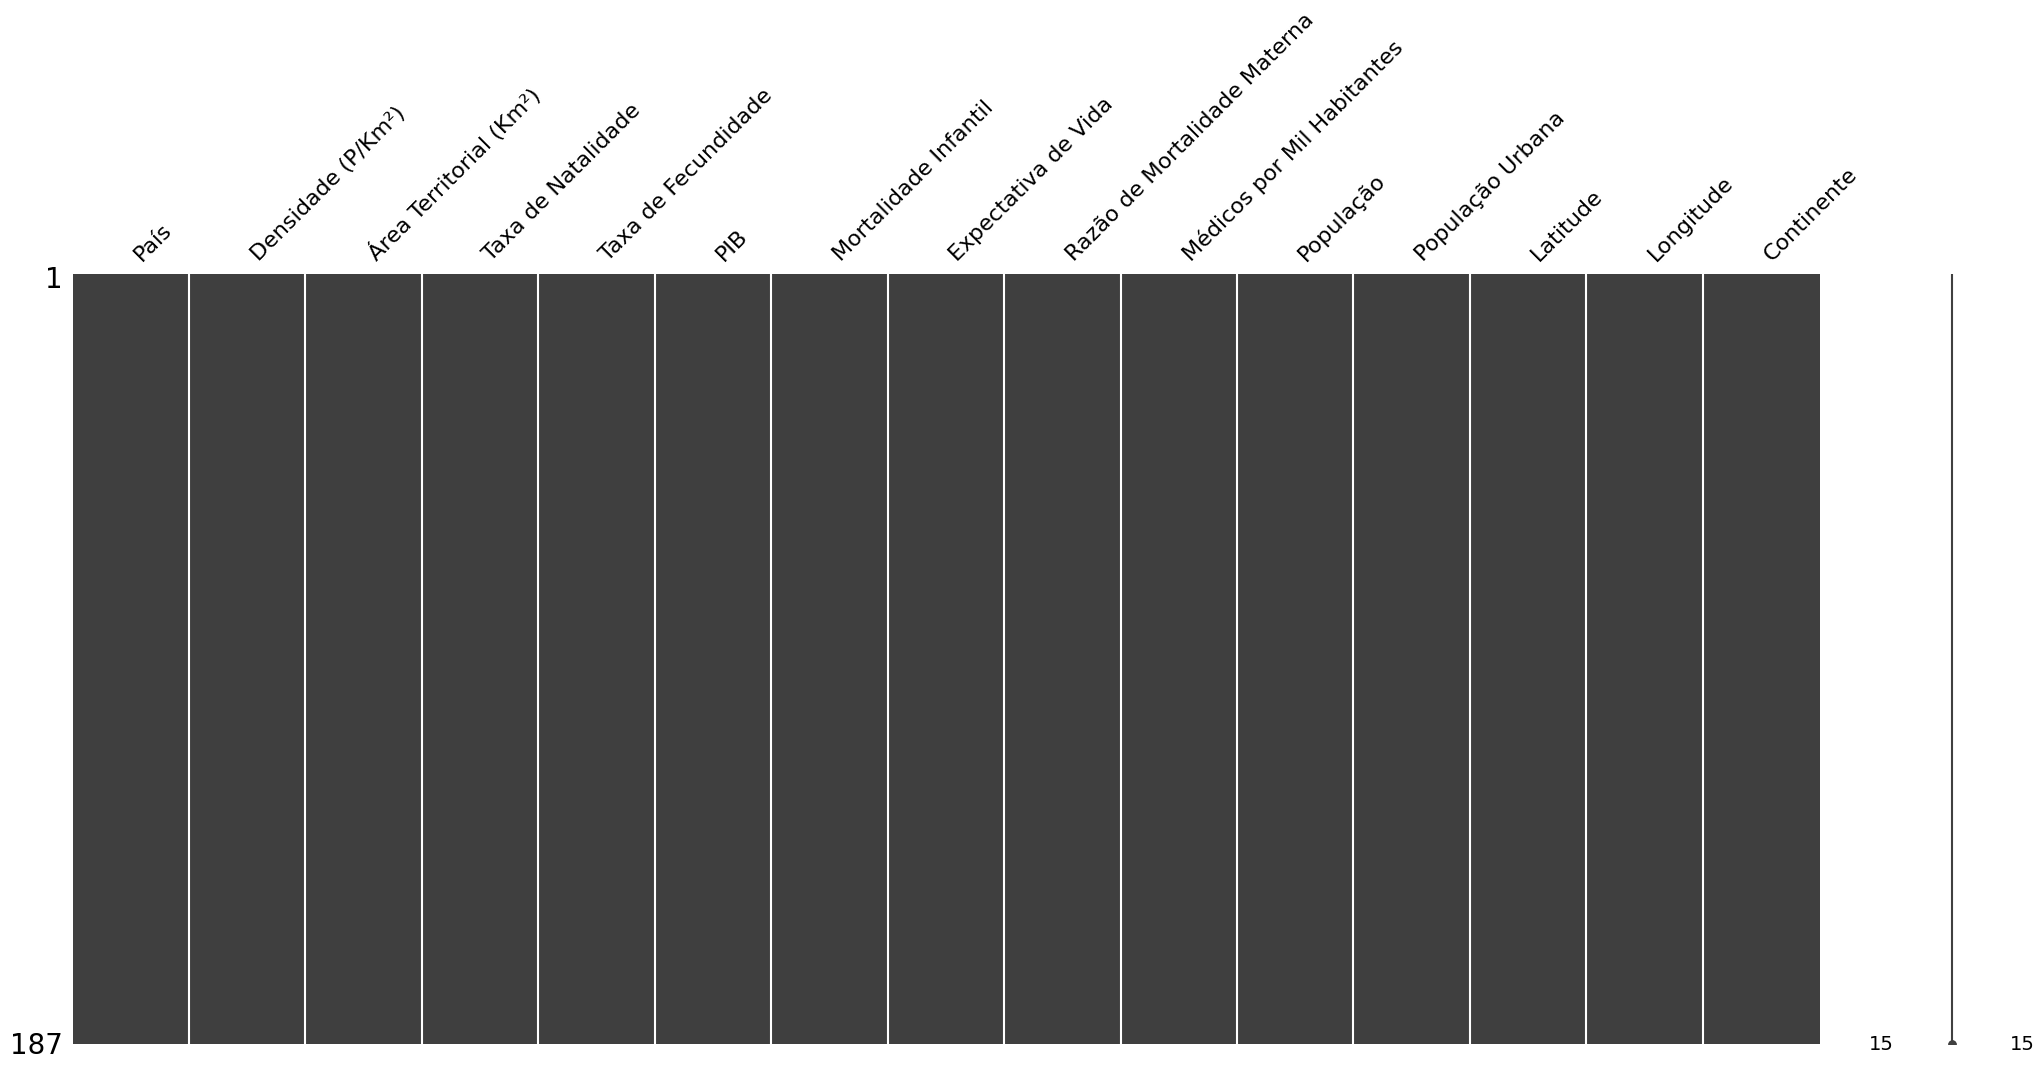

In [158]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(novo_df)

Com isso, os dados das colunas com atributos analisados graficamente serão tranformados, de modo a possibilitar a aplicação de algoritmo de machine learning futuramente.


In [159]:
# Transformando os dados
df_normalizado = transformar_dados(novo_df, colunas_saude, 'normalizar')

DataFrame Original:
          País  Densidade (P/Km²)  Área Territorial (Km²)  Taxa de Natalidade  \
0  Afeganistão                 60                  652230               32.49   
1      Albânia                105                   28748               11.78   
2      Argélia                 18                 2381741               24.28   
3      Andorra                164                     468                7.20   
4       Angola                 26                 1246700               40.73   

   Taxa de Fecundidade           PIB  Mortalidade Infantil  \
0                 4.47   19101353833                  47.9   
1                 1.62   15278077447                   7.8   
2                 3.02  169988236398                  20.1   
3                 1.27    3154057987                   2.7   
4                 5.52   94635415870                  51.6   

   Expectativa de Vida  Razão de Mortalidade Materna  \
0                 64.5                           638   
1       

Com a transformação dos dados realizadas, a etapa de pré-processamento dos dados selecionas foi concluída e a partir disso um modelo de machine learning para realizar o agrupamento pode ser construído.

## Considerações finais

Desse modo, conclui-se que foi possível identificar alguns padrões e tendências nos atributos selecionados para análise nesse MVP. Entendendo esses pontos, foi possível localizar os países e regiões onde alguns índices apresentam dados críticos do ponto de vista social. A idéia de agrupar países conforme os padrões distribuídos nos dados propricia um melhor mapeamento das regiões problemáticos, de forma a ser possível direcionar políticas e ações mitigadoras dos problemas nesses lugares.